# Modelo de Machine Learning para Prevenir Doenças Cardíacas

**Autor: Gabriel Schmöel**

**Data: 12/09/2022 - Projeto em Construção**

Este projeto busca pelo melhor algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver uma futura doença cardíaca. Para a produção desse modelo, foi utilizado o *data base*, já explorado e tratado, conrrespondente ao projeto [Fatores Clínicos e Laboratoriais de Doenças Cardíacas](https://github.com/gabriel-schmokel/data_science/blob/master/exploracao_tratamento/prever_doen%C3%A7as_cardiacas.ipynb) que se encontra no meu GitHub.

Este projeto *Machine Learning* constitue um modelo supervisionado de classificação, pois o arquivo de dados apresenta uma variável de resposta categórica, a qual informa se o paciente teve ou não a doença cardíaca. Essa variável é única e corresponde aos dados alvos que se deseja prever. 

Na etapa do pré-processamento dos dados os respectivos trabalhos foram solicitados:

* fazer a tranformação das variáveis categóricas nomianais em variáveis categóricas ordinais tanto manualmente quanto pelo uso do módulo *Label Encoder*, presente na biblioteca *sklearn*. Ambas as transformações devem ser armazenados em novos *data frames*.

* deve-se criar variáveis *dummy* (fictícias) com o objetivo de remover qualquer peso associado ao números que as variáveis categóricas ordinais carregam.

* fazer a separação do conjunto de dados das variáveis **previsoras** e de **alvo** para o *data frame* tendo feito a transformação cateórica ordinal manual e por *Label Encoder*, também deve-se fazer a separação do *data frame* feito a tranformação *OneHotEncoder* das variáveis. Posteriormente, todos esses *data frames* também devem ser escalonados de forma padronizada.

* avaliação das quatro pricipais variáveis que explicam o conjunto dos dados utilizando os respectivos métodos: **PCA**, **kernel PCA** e **LDA**. Obs: embora tenha sido solicitado essa tarefa, na elaboração dos modelos de *Machine Learning*, não deve-se trabalhar com a redução da dimensionalidade feita nessa etapa.

* salvar todas as variáveis **alvo** e **previsoras** para os eventuais trabalhos que os desenvolvedores de software venham a realizar. 

* separar 70% do conjunto de dados, de todas as variáveis previsoras e de alvo, como sendo de treino, posteriormente separ o restante como o conjunto de dados de teste.


Os dados foram extraídos do site do Kaggle, clique [aqui](https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1) para visualizá-los.


Por fim, foi solicitado classificar o melhor algoritmo de *Machine Learning* com o objetivo de contruir o melhor modelo. Os respectivos algoritmos, para todas as variáveis de treino e de teste, devem ser aplicados: **Naive Bayes**, **SVM**, **Regressão Logística**, **KNN**, **Árvore de Decisão**, **Random Foerest**, **XGBOOST**, **LIGHTGBM** e **CATBOOST**. Antes da criação de cada um dos modelos, uma breve explicação deve ser dada para cada um dos algoritmos. 


## 1) Dicionário das Variáveis

Variável                | Significado                                 | Valores Permitidos
---------               | ------                                      | -----
Age                     |  Idade do paciente                          | 20-100
Sex                     |  Sexo do paciente                           | F, M
Chest Pain Type         |  Tipo de Dor no Peito                       | ASY, ATA, NAP, TA
Resting BP              |  Pressão Sanguínea em Repouso em mmGh       | 75-250
Cholesterol             |  Colesterol séricodo paciente               | 60-700
Fasting BS              |  Açucar no sangue em jejum                  | 0, 1 
Resting ECG             |  Eletrocardiograma em repouso               | LVH, Normal, ST 
Max HR                  |  Frequência cardíaca máxima                 | 40-300
Exercise Angina         |  Angina induzida por exercício              | N, Y
Old Peak                |  Depressão de ST por exercício ao repouso   | (-5) - (7)
ST_Slope                |  Inclinação do segmento ST no ECG           | Down, Flat, Up
Heart Disease           |  Doença cardíaca (NÃO/SIM)                  | 0, 1


## 2) Carregando as Bibliotecas

In [1]:
import numpy as np  # importando a biblioteca numpy para a manipulação e operação de arrays.
import pandas as pd  # importando a biblioteca pandas para a manipulação de data frames.
import pickle  # importando a biblioteca para salvar e abrir arquivos de dados.
from sklearn.preprocessing import LabelEncoder # importando o módulo LabelEnconder para fazer o encoding das variáveis.
from sklearn.preprocessing import OneHotEncoder # importando o módulo OneHotEncoder para criação de variáveis dummy
from sklearn.compose import ColumnTransformer  # importando o módulo ColumnTransformer para a transformação das colunas (variáveis).
from sklearn.preprocessing import StandardScaler # importando o módulo StandardScaler para fazer o escalonamento das variáveis.
from sklearn.decomposition import PCA # importando o módulo PCA para fazer a redução da dimensionalidade das variáveis do arquivo.
from sklearn.decomposition import KernelPCA # importando o módulo KernelPCA para fazer a redução da dimensionalidade das variáveis do arquivo.
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # importando o módulo LinearDiscriminantAnalysis para fazer a redução da dimensionalidade das variáveis do arquivo.
from sklearn.model_selection import train_test_split # importando o módulo train_test_split para separar o dados de treino e de teste.
from sklearn.naive_bayes import GaussianNB # importando o módulo para a aplicação do Naive Bayes Gaussiano
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # importando módulo para realizar a acurácia do modelo, exibir a matriz de confusão e fazer o reporte de classificação.
from sklearn.model_selection import KFold # importando o módulo para separar os dados.
from sklearn.model_selection import cross_val_score # importando o método para fazer o score das separações dos dados feitos.
from sklearn.linear_model import LogisticRegression # importando o método LogisticRegression para fazer a regressão logística.
from sklearn.svm import SVC  # importando o módulo para a aplicação da Máquina Vetor de Suporte (SVM).
from sklearn.linear_model import LogisticRegression  # importando o módulo para a aplicação da Regressão Logística.

## 3) Carregando o Data Set

In [2]:
df = pd.read_csv('/content/drive/MyDrive/arquivos_de_leitura/heart_tratado.csv',
                 sep=';', encoding='utf-8')

In [3]:
# COMENTÁRIOS SOBRE O CÓDIGO

# pd.read_csv(...) é um método de leitura de aruivos csv da biblioteca pandas.
# o primeiro argumento direciona o caminho do diretório que contém o arquivo de leitura, o segundo argumento sep = '...' 
# deve informar como os dados estão separados no arquivo e o último argumento especifica os métodos de leitura possíveis.
# métodos de leituras possíves: utf-8, ISO 8859-1, ...

## 4) Visualizando O Arquivo de Dados 

Através da saída dos códigos abaixo, foi observado que o data frame está de acordo com o número de variáveis que foi apresentado no dicionário, um total de 12, também foi mostrado que o número de linhas que esse data frame possue corresponde a 917.

In [4]:
df.head()  # Verificando o cabeçalho do arquivo.

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca
0,40,M,ATA,140,289,N,Normal,172,N,0.0,Up,N
1,49,F,NAP,160,180,N,Normal,156,N,1.0,Flat,S
2,37,M,ATA,130,283,N,ST,98,N,0.0,Up,N
3,48,F,ASY,138,214,N,Normal,108,Y,1.5,Flat,S
4,54,M,NAP,150,195,N,Normal,122,N,0.0,Up,N


In [5]:
df.tail()  # Verificando as 5 linhas finais do arquivo.

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca
912,45,M,TA,110,264,N,Normal,132,N,1.2,Flat,S
913,68,M,ASY,144,193,S,Normal,141,N,3.4,Flat,S
914,57,M,ASY,130,131,N,Normal,115,Y,1.2,Flat,S
915,57,F,ATA,130,236,N,LVH,174,N,0.0,Flat,S
916,38,M,NAP,138,175,N,Normal,173,N,0.0,Up,N


In [6]:
df.shape  # Verificando a forma do data frame.

(917, 12)

In [7]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método head(...) permite a visualização das 5 primeiras linhas do data frame passado no primeiro argumento. Se for
# passado um segundo argumento, pode-se especificar o número de linhas a ser exibido nesse método.
# O método tail(...) permite a visualização das 5 linhas finais do data frame passado no primeiro argumento. Se for
# passado um segundo argumento, pode-se especificar o número de linhas a ser exibido nesse método.
# O atributo .shape retornar o número de linhas e colunas que o data frame contém.

## 5) Salvando O Data Frame Original

Devido as modificações que serão feitas no *data frame* foi copiado o conteúdo da variável *df* em *df1*.   

In [8]:
df1 = pd.DataFrame.copy(df) # copiando o conteúdo de df ao df1.

In [9]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método .pyco(...) permite copiar o conteúdo do dataframe passado como argumento e atribuir a uma nova variável.
# modificações do dataframe não irão surtir efeito no novo data frame criado. 

## 6) Pré-processamento dos Dados



### 6.1) "Enconding das Variáveis"

Foi solicidato duas maneiras de se fazer a transformação das variáveis categóricas nominais em variáveis categóricas ordinais. 

O primeiro código fez a tranformação manualmente, já o segundo, fez a alteração automaticamente, utilizando o pacote *Label Enconder*, presente na biblioteca *sklearn*. 

In [10]:
df1['sexo'].replace({'M':0, 'F': 1}, inplace=True)  # Modificando o valor das variáveis
df1['tipo_dor_peito'].replace({'TA':0, 'ATA': 1, 'NAP':2, 'ASY': 3}, inplace=True) # Modificando o valor das variáveis
df1['ecg'].replace({'Normal':0, 'ST': 1, 'LVH':2}, inplace=True) # Modificando o valor das variáveis
df1.angina_pós_exercicio.replace({'N':0, 'Y': 1}, inplace=True) # Modificando o valor das variáveis
df1['inclinacao_st'].replace({'Up':0, 'Flat': 1, 'Down':2}, inplace=True) # Modificando o valor das variáveis
df1.acucar_no_sangue.replace({'N':0, 'S': 1}, inplace=True) # Modificando o valor das variáveis
df1.doenca_cardiaca.replace({'N':0, 'S': 1}, inplace=True) # Modificando o valor das variáveis

df1.head() # Exibindo o a modificação. 

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca
0,40,0,1,140,289,0,0,172,0,0.0,0,0
1,49,1,2,160,180,0,0,156,0,1.0,1,1
2,37,0,1,130,283,0,1,98,0,0.0,0,0
3,48,1,3,138,214,0,0,108,1,1.5,1,1
4,54,0,2,150,195,0,0,122,0,0.0,0,0


A tabela acima mostra a transformação das variáveis nominais em ordinais feita manualmente, o data frame *df1* armazena o conteúdo de *df* após o "encoding". 

In [11]:
df2 = df.iloc[:, 0:13].values  # pegando todos os valores do df e transformando em um array. 
df2[:,1] = LabelEncoder().fit_transform(df2[:,1]) # fazendo o encoding da var 1 do array.
df2[:,2] = LabelEncoder().fit_transform(df2[:,2]) # fazendo o encoding da var 2 do array.
df2[:,5] = LabelEncoder().fit_transform(df2[:,5]) # fazendo o encoding da var 5 do array.
df2[:,6] = LabelEncoder().fit_transform(df2[:,6]) # fazendo o encoding da var 6 do array.
df2[:,8] = LabelEncoder().fit_transform(df2[:,8]) # fazendo o encoding do var 8 do array.
df2[:,10] = LabelEncoder().fit_transform(df2[:,10]) # fazendo o encoding do var 10 do array.
df2[:,11] = LabelEncoder().fit_transform(df2[:,11]) # fazendo o encoding do var 11 do array.


df2 = pd.DataFrame(df2) # transformando o array em data frame.
df2.columns = ['idade', 'sexo', 'tipo_dor_peito', 'pressao', 'colesterol', 'acucar_no_sangue', 
  'ecg', 'max_freq_cardiaca', 'angina_pós_exercicio', 'depressao_st', 'inclinacao_st', 'doenca_cardiaca']  # modificando
# o nome das variáveis com o atributo .columns 
df2.head()

,idade,sexo,tipo_dor_peito,pressao,colesterol,acucar_no_sangue,ecg,max_freq_cardiaca,angina_pós_exercicio,depressao_st,inclinacao_st,doenca_cardiaca
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


A tabela acima mostra a transformação das variáveis nominais em ordinais feita automaticamente com o uso do método **fit_transform(...)**, o data frame *df2* armazena o conteúdo de *df* após o "encoding". 

In [12]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método .replace(...) permite substituir um determinado valor de uma variável passada como argumento
# por outro valor específicado. 
# O método pd.DataFrame(...) permite transformar uma variável em um data frame.
# O atributo .columns permite modificar o nome das variáveis do data frame, bastando passar um vetor, 
# com a mesma dimensão do número de colunas do data frame, onde os elementos desse vetor sejam os nomes 
# desejados a fazer a modificação. 

### 6.2) OneHotEncoder: Criação de Variáveis Dummy

Foram criadas as variáveis *dummy* (fictícias) com o objetivo de remover qualquer peso associado ao números que as variáveis categóricas ordinais carregam. Essa etapa só é permitida após a transformação *encoding* das variáveis.  



In [13]:
df3 = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,6,8,10])],
                                remainder='passthrough').fit_transform(df2)  # Criando variáveis fictícias retornando um array a variável df4.
df3.shape # avaliando o formado do array

(917, 21)

Com o processo *OneHotEncoder*. foi identificado, pelo formato do array acima, que nove variáveis a mais foram criadas. 

A tabela do *data frame* abaixo mostram as variáveis, não sendo mais possível identificar aos olhos o significado delas.

In [14]:
df3 = pd.DataFrame(df3)  # Tranformando o array em um data frame.
df3.head()  # Eibindo as 5 primeiras linhas 

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,40,140,289,0,172,0.0,0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,49,160,180,0,156,1.0,1
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,37,130,283,0,98,0.0,0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,48,138,214,0,108,1.5,1
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,54,150,195,0,122,0.0,0


Brevemente, abrindo um parenteses no projeto, pode-se entender a remoção do peso das variáveis pela explicação das tabelas que seguem:

Tipo Dor Peito          | Significado                                 
---------               | ------                                
 0                      | ASY 
 1                      | ATA
 2                      | NAP
 3                      | TA                       

Para que não exista peso na tabela acima, pode-se criar outras quatro variáveis para representar o significado do valor da variável *tipo_dor_peito*, o qual os valores 0, 1, 2 e 3 irão corresponder a valores binários. 

Tipo Dor Peito |   A | B | C | D
---------      | --  |-- | --| --
  ASY          |   1 | 0 | 0 | 0  
  ATA          |   0 | 1 | 0 | 0 
  NAP          |   0 | 0 | 1 | 0
   TA          |   0 | 0 | 0 | 1     

In [15]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método ColumnTransformer(...) permite transformar as variáveis presente no data frame em diferentes tipos, 
# exemplo, no formato OneHotEncoder. Essa variável carrega uma série de argumento, onde específicamos cada um deles.

# - name: nome dado a transformação.
# - transformer: tipo de estimador (OneHotEncoder).
# - columns: colunas que serão transformadas.
# - remainder: o que acontecerá com o restante das colunas não relacionadas: 
# 1) drop = exclui as outras colunas.
# 2) passthrough = mantém as outras colunas. drop é default.  
# - sparse_threshold: parâmetro de classificação de matrizes esparsas. default é 0.3
# - n_jobs: número de trabalhos a serem executados em paralelo. default é nenhum
# - transformer_weights: definição de pesos aos transformadores.
# - verbose: default é False. se for True a execução é apresentada na tela.

### 6.3) Previsor e Alvo

Foi informado, na introdução *notebook*, que a única **variável alvo** presente nesse projeto é a *doenca_cardiaca*, logo as outras são **previsoras**. O código abaixo mostra a separação dos dados previsores e alvo para os *data frames* *df1*, *df2* e *df3*. 



In [16]:
previsores_manual = df1.iloc[:, 0:11].values # criando um array contendo todos os valores das variáveis previsoras e atribuindo a variável criada.
previsores_manual = pd.DataFrame(previsores_manual) # transformando o array num df.
previsores_manual.head() # exibindo as cinco primeiras linhas do df.

,0,1,2,3,4,5,6,7,8,9,10
0,40.0,0.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,1.0,2.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,0.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,1.0,3.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0
4,54.0,0.0,2.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0


Acima vemos as cinco primeiras linhas contendo os valores das linhas correspondentes as variáveis **previsoras** obtidas pelo *data frame* em que o "*encoding*" foi feito manualmente.

In [17]:
previsores_label_encoder = df2.iloc[:, 0:11].values # criando um array contendo todos os valores das variáveis previsoras e atribuindo a variável criada.
previsores_label_encoder = pd.DataFrame(previsores_label_encoder) # transformando o array num df.
previsores_label_encoder.head() # exibindo as cinco primeiras linhas do df.

,0,1,2,3,4,5,6,7,8,9,10
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


Acima vemos o *data frame* contendo os valores das linhas correspondentes as variáveis **previsoras** obtidas pelo *data frame* em que o "*encoding*" foi feito por um método direto do pacote *Label Encoder*.

In [18]:
previsores_hot_encoder = df3.iloc[:, 0:11].values # criando um array contendo todos os valores das variáveis previsoras e atribuindo a variável criada.
previsores_hot_encoder = pd.DataFrame(previsores_hot_encoder) # transformando o array num df.
previsores_hot_encoder.head() # exibindo as cinco primeiras linhas do df.

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


Acima vemos o array contendo os valores das linhas correspondentes as variáveis **previsoras** obtidas pelo *data frame* em que foi feita a transformação das variáveis "*OneHotEncoder*".

In [19]:
alvo = df1.iloc[:, 11].values # criando um array contendo todos os valores alvo e atribuindo a variável criada.
unique, counts = np.unique(alvo, return_counts=True) # contabilizando a frequencia de valores únicos do array.
print(np.array((unique, counts)).T) # exibindo a frequência de valores únicos do array.

[[  0 410]
 [  1 507]]


Acima vemos o array contabilizado os valores únicos do array alvo, o qual contém os valores das linhas correspondentes a variável **alvo**. 

A variável **alvo** corresponde a última coluna de qualquer um dos três *data frames*: *df1*, *df2* e *df3*.

In [20]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# .iloc[] permite localizar os valores do dataframe, logo atribuindo o método .values pode-se tranformar esses valores em um array.
#  o método np.unique() retorna a frequência de valores únicos presentes em um array.
# no.array() tranforma o argumento passado em um array e o atributo .T faz a operação transposta do array. 

### 6.4) Escalonamento das Variáveis

Muitas vezes, quando as variáveis possuem ordens de grandeza muito diferente entre os seus valores, elas podem consequentemente gerar modelos menos eficientes de *Machine Learnig*. Por essa razão, a fim de evitar esse problema, foi escalonado as variáveis dos *data frames* *df1*, *df2* e *df3* gerando respectivamente os novos *data frames* *previsores_manual*, *previsores_label_encoder* e *previsores_hot_encoder*. 

Exitem duas formas de se fazer o escalonamento das variáveis:  **padronização** (utiliza a média e o desvio padrão como referência para o escalonamento), **normalização** (utiliza os valores máximo e mínimos como referência para o escalonamento). Nesse projeto apenas foi feito o escalonaento por **padronização**, pois foi o único solicitado na introdução.  

In [21]:
previsores_manual_esc = StandardScaler().fit_transform(previsores_manual) # escalonando o data frame feito o "encoding" manualmente.
previsores_label_encoder_esc = StandardScaler().fit_transform(previsores_label_encoder) # escalonando o data frame feito o "encoding" pelo "Label Encoder".
previsores_hot_encoder_esc = StandardScaler().fit_transform(previsores_hot_encoder) # escalonando o data frame feito o "OneHotEncoder".

# transformando os arrays em data frames.
previsores_manual_esc = pd.DataFrame(previsores_manual_esc)
previsores_label_encoder_esc = pd.DataFrame(previsores_label_encoder_esc)
previsores_hot_encoder = pd.DataFrame(previsores_hot_encoder)

Foi evidenciado, pelo método **describe(...)**, que a diferença das ordens de grandendeza das variáveis previsoras não é maior que um devio padrão. Na tabela abaixo, foi evidenciado isso para *previsores_manual_esc* 

In [22]:
previsores_manual_esc.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02,917.000000,9.170000e+02,9.170000e+02,9.170000e+02,9.170000e+02
mean,1.859654e-16,7.748558e-18,1.046055e-16,7.767929e-16,1.510969e-16,4.649135e-17,0.000000,-5.114048e-16,-1.046055e-16,7.748558e-17,-3.874279e-17
std,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00,1.000546,1.000546e+00,1.000546e+00,1.000546e+00,1.000546e+00
min,-2.704405e+00,-5.163086e-01,-2.418822e+00,-2.920572e+00,-2.882574e+00,-5.517333e-01,-0.749818,-3.016886e+00,-8.243101e-01,-3.269662e+00,-1.051095e+00
25%,-6.900904e-01,-5.163086e-01,-2.705801e-01,-6.971063e-01,-4.927927e-01,-5.517333e-01,-0.749818,-6.596226e-01,-8.243101e-01,-8.315022e-01,-1.051095e+00
50%,5.202558e-02,-5.163086e-01,8.035410e-01,-1.412398e-01,-3.260638e-01,-5.517333e-01,-0.749818,4.755658e-02,-8.243101e-01,-2.688500e-01,5.965186e-01
75%,6.881250e-01,-5.163086e-01,8.035410e-01,4.146267e-01,4.890553e-01,-5.517333e-01,0.491306,7.547357e-01,1.213136e+00,5.751284e-01,5.965186e-01
max,2.490407e+00,1.936826e+00,8.035410e-01,3.749826e+00,6.713601e+00,1.812470e+00,1.732430,2.561971e+00,1.213136e+00,4.982571e+00,2.244132e+00


Observe que a diferença para a mesma variável não escalonada é muito maior entre os seus valores.

In [23]:
previsores_manual.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.00000
mean,53.509269,0.210469,2.251908,132.540894,240.600872,0.233370,0.604144,136.789531,0.404580,0.886696,0.63795
std,9.437636,0.407864,0.931502,17.999749,54.009298,0.423206,0.806161,25.467129,0.491078,1.066960,0.60727
min,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.00000
25%,47.000000,0.000000,2.000000,120.000000,214.000000,0.000000,0.000000,120.000000,0.000000,0.000000,0.00000
50%,54.000000,0.000000,3.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,1.00000
75%,60.000000,0.000000,3.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,1.00000
max,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.00000


### 6.5) Redução de dimensionalidade

Arquivos de dados, que contém um grande número de variáveis, exigem cada vez mais processamento computacional, muitas vezes, trabalhar com toda a quantidade é inviável. Além disso, esse grande volume pode prejudicar a elaboração dos modelos de *Machine Learning*. A maior correlação entre as variáveis permite selecionar as melhores componentes para se fazer os modelos, reduzindo então a dimensionalidade do *data frame*.

Foi solicidado a avaliação das quatro variáveis que melhor explicam os modelos utilizando **PCA**, **kernel PCA** e **LDA**. 



#### a) Análise dos Componentes Principais (PCA)

O **PCA** é um algoritimo de *machine learning* de aprendizagem não supervisionada aplicado a dados linearmente separáveis que tem a função de reduzir a dimensionalidade do *data frame* pela determinação dos componentes principais. Esse algorítimo faz a seleção das variáveis de duas formas: *seleção de características* ou *extração de características*. A *seleção de características* seleciona os melhores atributos e não faz transformações, já a *extração de características* encontra o relacionamento dos melhores variáveis e cria novos atributos.

O código que segue gerou um array que contém a seleção das quatro componente principais pela *extração de características* utilizando o **PCA**.


In [24]:
pca = PCA(n_components=4, svd_solver = "auto")  # configurando o método PCA para fazer a redução das variáveis.
previsores_manual_pca = pca.fit_transform(previsores_manual) # aplicando a seleção das variáveis pelo PCA ao data frame e obtendo um array de saída.
previsores_manual_pca.shape  # evidenciando o formato do array de saída.

(917, 4)

O array abaixo mostrou a taxa percentual que cada uma das quatro variáveis selecionadas conseguem explicar a quantidade total dos dados previsores. 

In [25]:
pca.explained_variance_ratio_ # Razão das variáveis explicativas

array([0.73341947, 0.16890795, 0.07948616, 0.01736938])

A saída do array abaixo mostrou a taxa percentual que quantidade total das variáveis selecionadas conseguem explicar o conjuto total dos dados previsores.

In [26]:
pca.explained_variance_ratio_.sum() # Soma das variáveis explicativas

0.9991829622130765

In [27]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método PCA permite fazer as configurações desejáveis para fazer a redução das variáveis quando for aplicado a trans-
# formação. O primeiro argumento, 'n_components', específica o número de variáveis que se deseja selecionar. O segundo
# argumento 'svd_solver' informa qual será a forma que será feita a separação das variáveis. 
# O atributo explained_variance_ratio_ retorna um array o qual informa o percentual que cada uma das variáveis seleciona-
# das consegue explicar o conjunto das variáveis previsoras. 

#### b) Kernel PCA

O **Kernel PCA** também é um algoritimo de *machine learning* de aprendizagem não supervisionada aplicado a dados linearmente separáveis que tem a função de reduzir a dimensionalidade do *data frame* pela determinação dos componentes principais. 

O array abaixo mostrou a seleção das quatro melhores variáveis que explicam as variáveis previsoras.

In [28]:
kpca = KernelPCA(n_components=4, kernel='rbf') # configurando o método KermelPCA para fazer a redução das variáveis.
previsores_kernel = kpca.fit_transform(previsores_manual) # aplicando a seleção das variáveis pelo KernelPCA ao data frame e obtendo um array de saída.
previsores_kernel.shape  # evidenciando o formato do array de saída.

(917, 4)

In [29]:
previsores_kernel # exibindo as componentes principais do array.

array([[-0.0038041 , -0.00334581, -0.00206391, -0.00193661],
       [-0.00380545, -0.00334707, -0.00206478, -0.00193751],
       [-0.00380422, -0.00334592, -0.00206399, -0.00193669],
       ...,
       [-0.00380412, -0.00334583, -0.00206393, -0.00193662],
       [-0.00380422, -0.00334592, -0.00206399, -0.00193669],
       [-0.0038041 , -0.00334581, -0.00206391, -0.00193661]])

In [30]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método KernelPCA permite fazer as configurações desejáveis para fazer a redução das variáveis quando for aplicado a trans-
# formação. O primeiro argumento, 'n_components', específica o número de variáveis que se deseja selecionar. O segundo
# argumento 'kernel' informa qual será a forma que será feita a separação das variáveis. 

#### c) Análise do Discriminante Linear (LDA: Linear Discriminant Analysis)

O **LDA** é um algoritmo de redução de dimensionalidade de variáveis, que ao contrário dos vistos acima, utiliza aprendizagem supervisionada, esse algoritmo é aplicado em situações onde há muitos atributos previsores e alvos.

Como a variável alvo só possue dois valores, foi observado uma incompatibilidade em fazer a redução de dimensionalidade com esse método, já que '*n_components*' só aceita valores em que é igual ao número de classes menos 1. Logo, foi obtido uma única variável selecionada, cujo array abaixo demonstra os valores.

In [31]:
lda = LinearDiscriminantAnalysis(n_components = 1)
previsores_lda = lda.fit_transform(previsores_manual, alvo)

In [32]:
lda.explained_variance_ratio_

array([1.])

In [33]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LinearDiscriminantAnalysis permite fazer as configurações desejáveis para fazer a redução das variáveis quando for aplicado a trans-
# formação. O argumento 'n_components' específica o número de variáveis que se deseja selecionar.
# Quando passamos o método fit_transform ao lda, deve-se passar como argumento tanto variáveis previsoras como as alvas.

### 6.6) Salvando as variáveis (atributos)

Foi salvo todas as variáveis, alvo e previsoras, em arquivos de dados, para eventuais trabalhos que desenvolvedores de software venham a realizar.   

In [34]:
arq1 = open('heart.pkl', 'wb') # Criando o arquivo.
pickle.dump(alvo, arq1)  # Salvando a variável alvo no arquivo.
arq2 = open('heart2.pkl', 'wb') # Criando o arquivo.
pickle.dump(previsores_manual, arq2) # Salvando a variável previsores manual no arquivo de dados.
arq3 = open('heart3.pkl', 'wb') # Criando o arquivo.
pickle.dump(previsores_manual_esc, arq3) # Salvando a variável previsores manual escalonado no arquivo de dados.
arq4 = open('heart4.pkl', 'wb') # Criando o arquivo.
pickle.dump(previsores_label_encoder, arq4) # Salvando a variável previsores label encoder no arquivo de dados.
arq5 = open('heart5.pkl', 'wb') # Criando o arquivo.
pickle.dump(previsores_hot_encoder, arq5) # Salvando a variável previsores hot encoder no arquivo de dados.
arq6 = open('heart6.pkl', 'wb') # Criando o arquivo.
pickle.dump(previsores_hot_encoder_esc, arq6) # Salvando a variável previsores hot encoder esc no arquivo de dados.

Foi testado se a variável alvo foi salva 

In [35]:
arq1 = open('heart.pkl', 'rb')
alvo = pickle.load(arq1)
alvo

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

Foi testado se a variável previsores manual foi salva corretamente. 

In [36]:
arq2 = open('heart2.pkl', 'rb')
previsores = pickle.load(arq2)
previsores

,0,1,2,3,4,5,6,7,8,9,10
0,40.0,0.0,1.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,1.0,2.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,0.0,1.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,1.0,3.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,1.0
4,54.0,0.0,2.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
912,45.0,0.0,0.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,1.0
913,68.0,0.0,3.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,1.0
914,57.0,0.0,3.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,1.0
915,57.0,1.0,1.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,1.0


### 6.7) Base de Treino e Teste

Foi separado 70% do conjunto de dados, de todas variáveis previsoras e de alvo, como sendo de treino, os quais serão utilizados nos algoritmos de *machine learning* para criação dos modelos. O restante foi separado como de teste, esses serão utilizados para fazer as previsões reais dos modelos criados, permitindo medir o desempenho real. Também foi selecionando os dados de maneira aleatória, a fim de evitar padrões no momento da divisão dos dados.

In [37]:
# CRIANDO AS VARIÁVEIS DE TREINO E TESTE
x_treino_manual, x_teste_manual, y_treino_manual, y_teste_manual = train_test_split(previsores_manual, alvo, test_size = 0.3, random_state = 0)
x_treino_manual_esc, x_teste_manual_esc, y_treino_manual_esc, y_teste_manual_esc = train_test_split(previsores_manual_esc, alvo, test_size = 0.3, random_state = 0)
x_treino_label_encoder, x_teste_label_encoder, y_treino_label_encoder, y_teste_label_encoder = train_test_split(previsores_label_encoder, alvo, test_size = 0.3, random_state = 0)
x_treino_label_encoder_esc, x_teste_label_encoder_esc, y_treino_label_encoder_esc, y_teste_label_encoder_esc = train_test_split(previsores_label_encoder_esc, alvo, test_size = 0.3, random_state = 0)
x_treino_hot_encoder, x_teste_hot_encoder, y_treino_hot_encoder, y_teste_hot_encoder = train_test_split(previsores_hot_encoder, alvo, test_size = 0.3, random_state = 0)
x_treino_hot_encoder_esc, x_teste_hot_encoder_esc, y_treino_hot_encoder_esc, y_teste_hot_encoder_esc = train_test_split(previsores_hot_encoder_esc, alvo, test_size = 0.3, random_state = 0)

In [38]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método train_test_split retorna o conjunto de dados de treinamento e teste para as variáveis previsoras e alva.
# Os argumentos mais importantes que essa função recebe são:    
# os arrays previsores e alvo.   
# o argumento test_size, o qual específica o tamanho em porcentagem dos dados de teste.    
# o argumento train_size, o qual específica o tamanho em porcentagem dos dados de treinamento.  
# random_state: nomeação de um estado aleatório, especificar o valor significa dizer que se está sempre utilizando
# a mesma separação de dados aleatórios quando se executa o programa.
# shuffle: embaralhamento dos dados aleatórios. Associado com o random_state ocorre o mesmo embaralhamento sempre. Default é True.  
# stratify: Possibilidade de dividir os dados de forma estratificada. Default é None (nesse caso é mantido a proporção, isto é, se tem 30% de zeros e 70% de 1 no dataframe, na separação em treinamento e teste se manterá essa proporção).

## 7) Aplicação dos Algoritmos de *Machine Learning*

Nessa seção foi explorado o melhor algoritmo de *Machine Learning*, para o *data set* apresentado na introdução do projeto, com o objetivo de contruir o melhor modelo. Os respectivos algoritmos, **Naive Bayes**, **SVM**, **Regressão Logística**, **KNN**, **Árvore de Decisão**, **Random Foerest**, **XGBOOST**, **LIGHTGBM** e **CATBOOST**, foram aplicados para todas as variáveis de treino e de teste, feitas na etapa do pré-processamento.  

### 7.1) Naive Bayes

**Resumo:** o algoritmo de Naive Bayes é utilizado apenas para a classificação e é baseado na aplicação do teorema de *Bayes*. Esse algoritmo possue uma premissa: as variáveis do conjunto de dados devem ser independentes. O algoritmo torna-se eficiente quando se têm conjuntos de dados categóricas, já que trabalha muito bem com as variáveis categóricas. Esse algoritmo tem a vantagem de ser rápido, pois exige pouco esforço computacional, logo apresenta bons resultados para os trabalhos com *Big Data*. A desvantagem desse método é que não é possível atribuir um valor nulo de probabilidade, logo quando uma classe contida no conjunto de teste não se apresenta no conjunto de treino ocorrerá um erro. 

Obs: para mais detalhes desse algoritmo clique [aqui](https://scikit-learn.org/stable/modules/naive_bayes.html).




#### a) previsor_manual

Para o treinamento do modelo foi utilizado o algoritmo de naive bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *encoding* manual e os dados do alvo.

In [39]:
naive_manual = GaussianNB().fit(x_treino_manual, y_treino_manual)  # treinando o algoritmo pelo Naive Bayes.

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *encoding* manual, o código abaixo exibe isso.

In [40]:
previsoes_naive_manual = naive_manual.predict(x_teste_manual)  # previsões feita pelo modelo do Naive Bayes.

Foi medida a acurácia do modelo pelos valores de *previsoes_naive_manual* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 84,78%.

In [41]:
accuracy_score(y_teste_manual, previsoes_naive_manual)

0.8478260869565217

A matriz de confusão abaixo mostrou que existem 23 valores falsos negativos e 19 falsos positivos, ou seja, 42 valores errados de um total de 276 valores. 

In [42]:
confusion_matrix(y_teste_manual, previsoes_naive_manual)

array([[102,  19],
       [ 23, 132]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 83,46%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [43]:
previsoes_naive_manual_treino = naive_manual.predict(x_treino_manual)
accuracy_score(y_treino_manual, previsoes_naive_manual_treino)

0.8346333853354134

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 85%. 

In [44]:
print(classification_report(y_teste_manual, previsoes_naive_manual))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       121
           1       0.87      0.85      0.86       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [45]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método GaussianNB() treinamento faz o treinamento do modelo utilizado o algoritmo de naive bayes 
# considerando a probabilidade condicional Guassiana.
# O método que faznecessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### b) Validação Cruzada previsor_manual



Para o treinamento do modelo foi utilizado o algoritmo de Naive Bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *encoding* manual e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo de Naive Bayes e a validação cruzada, para dados de teste, foi de 84,18%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_maual*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.    

In [46]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = GaussianNB() # atribuindo a probabilidade condicional Gaussiana ao modelo de Naive Bayes e armazenando na variável modelo.
resultado = cross_val_score(modelo, previsores_manual, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.18%


In [47]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### c) previsor_manual_esc

Para o treinamento do modelo foi utilizado o algoritmo de naive bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *encoding* manual escalonado e os dados do alvo.

In [48]:
naive_manual_esc = GaussianNB().fit(x_treino_manual_esc, y_treino_manual_esc)  # treinando o algoritmo pelo Naive Bayes.

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *encoding* manual escalonado, o código abaixo exibe isso.

In [49]:
previsoes_naive_manual_esc = naive_manual.predict(x_teste_manual_esc)  # previsões feita pelo modelo do Naive Bayes.

Foi medida a acurácia do modelo pelos valores de *previsoes_naive_manual_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,51%.

In [50]:
accuracy_score(y_teste_manual_esc, previsoes_naive_manual_esc)  # Medindo a acurácia do modelo.

0.855072463768116

A matriz de confusão abaixo mostrou que existem 15 valores falsos negativos e 25 falsos positivos, ou seja, 40 valores errados de um total de 276 valores.

In [51]:
confusion_matrix(y_teste_manual_esc, previsoes_naive_manual_esc) # Obtendo a matriz de confusão.

array([[ 96,  25],
       [ 15, 140]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 82,37%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [52]:
previsoes_naive_manual_esc_treino = naive_manual.predict(x_treino_manual_esc)
accuracy_score(y_treino_manual_esc, previsoes_naive_manual_esc_treino)

0.8237129485179407

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 86%. 

In [53]:
print(classification_report(y_teste_manual_esc, previsoes_naive_manual_esc))

              precision    recall  f1-score   support

           0       0.86      0.79      0.83       121
           1       0.85      0.90      0.88       155

    accuracy                           0.86       276
   macro avg       0.86      0.85      0.85       276
weighted avg       0.86      0.86      0.85       276



In [54]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método GaussianNB() treinamento faz o treinamento do modelo utilizado o algoritmo de naive bayes 
# considerando a probabilidade condicional Guassiana.
# O método que faznecessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### d) Validação Cruzada previsor_manual_esc

Para o treinamento do modelo foi utilizado o algoritmo de Naive Bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *encoding* manual escalonado e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo de Naive Bayes e a validação cruzada, para dados de teste, foi de 84,18%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_maual*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.    

In [55]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = GaussianNB() # atribuindo a probabilidade condicional Gaussiana ao modelo de Naive Bayes e armazenando na variável modelo.
resultado = cross_val_score(modelo, previsores_manual_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.18%


In [56]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### e) previsores_label_encoder

Para o treinamento do modelo foi utilizado o algoritmo de naive bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram obtidos do *label encoder* feito e os dados do alvo.

In [57]:
naive_label_encoder = GaussianNB().fit(x_treino_label_encoder, y_treino_label_encoder)  # treinando o algoritmo pelo Naive Bayes.

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *label encoder*, o código abaixo exibe isso.

In [58]:
previsoes_naive_label_encoder = naive_label_encoder.predict(x_teste_label_encoder)  # previsões feita pelo modelo do Naive Bayes.

Foi medida a acurácia do modelo pelos valores de *previsoes_naive_label_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 84,42%.

In [59]:
accuracy_score(y_teste_label_encoder, previsoes_naive_label_encoder)

0.8442028985507246

A matriz de confusão abaixo mostrou que existem 24 valores falsos negativos e 19 falsos positivos, ou seja, 43 valores errados de um total de 276 valores.

In [60]:
confusion_matrix(y_teste_label_encoder, previsoes_naive_label_encoder)

array([[102,  19],
       [ 24, 131]])

Foi observado que não houve overfitting, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 83,93%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [61]:
previsoes_naive_label_encoder_treino = naive_label_encoder.predict(x_treino_label_encoder)
accuracy_score(y_treino_label_encoder, previsoes_naive_label_encoder_treino)

0.8393135725429017

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida f-score atingiu o valor de 84%.

In [62]:
print(classification_report(y_teste_label_encoder, previsoes_naive_label_encoder))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83       121
           1       0.87      0.85      0.86       155

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.85      0.84      0.84       276



In [63]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método GaussianNB() treinamento faz o treinamento do modelo utilizado o algoritmo de naive bayes 
# considerando a probabilidade condicional Guassiana.
# O método que faznecessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### f) Validação Cruzada previsor_label_encoder

Para o treinamento do modelo foi utilizado o algoritmo de Naive Bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *label encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo de Naive Bayes e a validação cruzada, para dados de teste, foi de 84,06%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_label_encoder*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.    

In [64]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = GaussianNB() # atribuindo a probabilidade condicional Gaussiana ao modelo de Naive Bayes e armazenando na variável modelo.
resultado = cross_val_score(modelo, previsores_label_encoder, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.06%


In [65]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### g) previsores_label_encoder_esc

Para o treinamento do modelo foi utilizado o algoritmo de naive bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram obtidos do *label encoder_esc* feito e os dados do alvo.

In [66]:
naive_label_encoder_esc = GaussianNB().fit(x_treino_label_encoder_esc, y_treino_label_encoder_esc)  # treinando o algoritmo pelo Naive Bayes.

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *label encoder* escalonado, o código abaixo exibe isso.

In [67]:
previsoes_naive_label_encoder_esc = naive_label_encoder.predict(x_teste_label_encoder_esc)  # previsões feita pelo modelo do Naive Bayes.

Foi medida a acurácia do modelo pelos valores de *previsoes_naive_label_encoder_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 71,01%.

In [68]:
accuracy_score(y_teste_label_encoder_esc, previsoes_naive_label_encoder_esc)

0.7101449275362319

A matriz de confusão abaixo mostrou que existem 7 valores falsos negativos e 73 falsos positivos, ou seja, 80 valores errados de um total de 276 valores.

In [69]:
confusion_matrix(y_teste_label_encoder_esc, previsoes_naive_label_encoder_esc)

array([[ 48,  73],
       [  7, 148]])

Foi observado que houve overfitting, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 83,93%. Portanto, um valor com diferença percentual de 10%, aos resultados obitidos pelos dados de teste.

In [70]:
previsoes_naive_label_encoder_esc_treino = naive_label_encoder_esc.predict(x_treino_label_encoder_esc)
accuracy_score(y_treino_label_encoder_esc, previsoes_naive_label_encoder_esc_treino)

0.8393135725429017

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida f-score atingiu o valor de 71%.

In [71]:
print(classification_report(y_teste_label_encoder_esc, previsoes_naive_label_encoder_esc))

              precision    recall  f1-score   support

           0       0.87      0.40      0.55       121
           1       0.67      0.95      0.79       155

    accuracy                           0.71       276
   macro avg       0.77      0.68      0.67       276
weighted avg       0.76      0.71      0.68       276



In [72]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método GaussianNB() treinamento faz o treinamento do modelo utilizado o algoritmo de naive bayes 
# considerando a probabilidade condicional Guassiana.
# O método que faznecessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### h) Validação Cruzada previsor_label_encoder_esc

Para o treinamento do modelo foi utilizado o algoritmo de Naive Bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *label encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo de Naive Bayes e a validação cruzada, para dados de teste, apresentaram uma diferença de 10%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_label_encoder_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, não foi a ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados significativamente distantes.     

In [73]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo_ = GaussianNB() # atribuindo a probabilidade condicional Gaussiana ao modelo de Naive Bayes e armazenando na variável modelo.
resultado = cross_val_score(modelo, previsores_label_encoder_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.06%


#### i) previsores_one_hot_encoder

Para o treinamento do modelo foi utilizado o algoritmo de naive bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram obtidos do *one hot encoder* feito e os dados do alvo.

In [74]:
naive_one_hot_encoder = GaussianNB().fit(x_treino_hot_encoder, y_treino_hot_encoder)  # treinando o algoritmo pelo Naive Bayes.

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *one hot encoder*, o código abaixo exibe isso.

In [75]:
previsoes_naive_one_hot_encoder = naive_one_hot_encoder.predict(x_teste_hot_encoder)  # previsões feita pelo modelo do Naive Bayes.

Foi medida a acurácia do modelo pelos valores de *previsoes_naive_one_hot_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 80,47%.

In [76]:
accuracy_score(y_teste_hot_encoder, previsoes_naive_one_hot_encoder)

0.8007246376811594

A matriz de confusão abaixo mostrou que existem 23 valores falsos negativos e 32 falsos positivos, ou seja, 55 valores errados de um total de 276 valores.

In [77]:
confusion_matrix(y_teste_hot_encoder, previsoes_naive_one_hot_encoder)

array([[ 89,  32],
       [ 23, 132]])

Foi observado que não houve overfitting, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 78,93%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [78]:
previsoes_naive_one_hot_encoder_treino = naive_one_hot_encoder.predict(x_treino_hot_encoder)
accuracy_score(y_treino_hot_encoder, previsoes_naive_one_hot_encoder_treino)

0.7893915756630265

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida f-score atingiu o valor de 80%.

In [79]:
print(classification_report(y_teste_hot_encoder, previsoes_naive_one_hot_encoder))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       121
           1       0.80      0.85      0.83       155

    accuracy                           0.80       276
   macro avg       0.80      0.79      0.80       276
weighted avg       0.80      0.80      0.80       276



In [80]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método GaussianNB() treinamento faz o treinamento do modelo utilizado o algoritmo de naive bayes 
# considerando a probabilidade condicional Guassiana.
# O método que faznecessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### j) Validação Cruzada previsor_hot_encoder

Para o treinamento do modelo foi utilizado o algoritmo de Naive Bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *one hot encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo de Naive Bayes e a validação cruzada, para dados de teste, foi de 79,28%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_hot_encoder*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.    

In [81]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = GaussianNB() # atribuindo a probabilidade condicional Gaussiana ao modelo de Naive Bayes e armazenando na variável modelo.
resultado = cross_val_score(modelo, previsores_hot_encoder, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 79.28%


In [82]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### k) previsores_one_hot_encoder_esc

Para o treinamento do modelo foi utilizado o algoritmo de naive bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram obtidos do *one hot encoder* escalonado feito e os dados do alvo.

In [83]:
naive_one_hot_encoder_esc = GaussianNB().fit(x_treino_hot_encoder_esc, y_treino_hot_encoder_esc)  # treinando o algoritmo pelo Naive Bayes.

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *one hot encoder* escalonado, o código abaixo exibe isso.

In [84]:
previsoes_naive_one_hot_encoder_esc = naive_one_hot_encoder.predict(x_teste_hot_encoder_esc)  # previsões feita pelo modelo do Naive Bayes.

Foi medida a acurácia do modelo pelos valores de *previsoes_naive_one_hot_encoder_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 72,82%.

In [85]:
accuracy_score(y_teste_hot_encoder_esc, previsoes_naive_one_hot_encoder_esc)

0.7282608695652174

A matriz de confusão abaixo mostrou que existem 56 valores falsos negativos e 19 falsos positivos, ou seja, 65 valores errados de um total de 276 valores.

In [86]:
confusion_matrix(y_teste_hot_encoder_esc, previsoes_naive_one_hot_encoder_esc)

array([[102,  19],
       [ 56,  99]])

Foi observado que não houve overfitting, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 78,93%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [87]:
previsoes_naive_one_hot_encoder_treino_esc = naive_one_hot_encoder_esc.predict(x_treino_hot_encoder_esc)
accuracy_score(y_treino_hot_encoder_esc, previsoes_naive_one_hot_encoder_treino_esc)

0.7893915756630265

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida f-score atingiu o valor de 73%.

In [88]:
print(classification_report(y_teste_hot_encoder_esc, previsoes_naive_one_hot_encoder_esc))

              precision    recall  f1-score   support

           0       0.65      0.84      0.73       121
           1       0.84      0.64      0.73       155

    accuracy                           0.73       276
   macro avg       0.74      0.74      0.73       276
weighted avg       0.75      0.73      0.73       276



In [89]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método GaussianNB() treinamento faz o treinamento do modelo utilizado o algoritmo de naive bayes 
# considerando a probabilidade condicional Guassiana.
# O método que faznecessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### l) Validação Cruzada previsor_hot_encoder_esc

Para o treinamento do modelo foi utilizado o algoritmo de Naive Bayes considerando a probabilidade condicional Guassiana, cujos dados provisores foram o *one hot encoder* escalonado e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo de Naive Bayes e a validação cruzada, para dados de teste, foi de 79,28%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_hot_encoder_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.    

In [90]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = GaussianNB() # atribuindo a probabilidade condicional Gaussiana ao modelo de Naive Bayes e armazenando na variável modelo.
resultado = cross_val_score(modelo, previsores_hot_encoder_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 79.28%


In [91]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### m) Determinação da Melhor Variável Previsora


Variável                | Acurácia S/ A Validação Cruzada  | Acurácia C/ A Validação Cruzada  | Total de Erros na Matriz Confusão
---------               | ------                           | ----- | -----
Encoder Manual          |  85%                             | 84%   | 42
Encoder Manual Esc      |  86%                             | 84%   | 40
Label Encoder           |  84%                             | 84%   | 43
Label Encoder Esc       |  71%                             | 84%   | 73
One Hot Encoder         |  80%    | 79%   | 55
One Hot Encoder Esc     |  73%       | 79%   | 65


As subseções de a-l permitiram a construção da tabela acima, com ela foi verificado que a variável *previsor_manual_esc* é a que possibilita a contrução do modelo de *machine learning* mais eficiente para o algoritmo de Naive Bayes.     

### 7.2) Máquina de Vetor de Suporte (SVM):

**Resumo:** o algoritmo Máquna de Vetor de Suporte (SVM) é aplicado somente na aprendizagem supervisionada, tanto em classificação como em regressão. Quando aplicado na classificação recebe um nome especial: Classificador de Vetor de Suporte (SVC). A ideia do SVM é encontrar uma linha/hiperplano de separação entre a classe dos dados. Esse hiperplano busca maximizar a distância entre os pontos mais próximos em relação a cada uma das classes, a imagem que segue descreve isso.

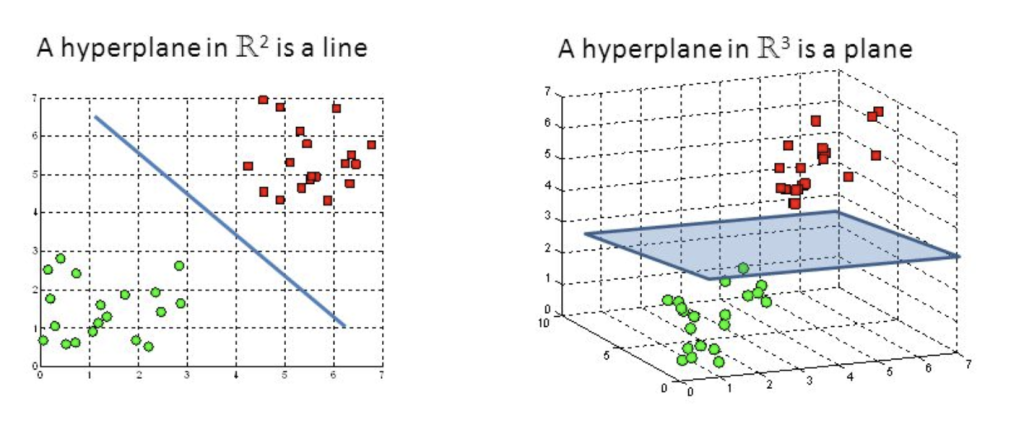

A equação matemática base que descreve esse algoritmo é $$ \vec w \cdot \vec x + b \ge 0,$$ onde $\vec w$ é o vetor hiperplano, $\vec x$ são os vetores que pertencem ao hiperplano e $b$ é uma constante que representa o deslocamento em relação a origem. 

Obs: o SVM pode ser linearmente separável ou não. Para mais detalhes desse algoritmo clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).



#### a) previsor_manual

Para o treinamento do modelo foi utilizado o algoritmo SVC (máquina vetor de suporte para classificação), cujos dados provisores foram o *encoding* manual e os dados do alvo. Observe, que os hiperparâmetro $C=50$ e *Kernel* = *linear* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [92]:
svc_manual = SVC(kernel='linear', random_state=1, C = 50)  # configurando os hiperparâmetros para elaboração do modelo SVC.
svc_manual.fit(x_treino_manual, y_treino_manual)  # treinando o algoritmo SVC.

SVC(C=50, kernel='linear', random_state=1)

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *encoding* manual, o código abaixo exibe isso.

In [93]:
previsoes_svc_manual = svc_manual.predict(x_teste_manual)  # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_svc_manual* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 86,59%.

In [94]:
accuracy_score(y_teste_manual, previsoes_svc_manual)  # medindo a acurácia do modelo com os dados de teste.

0.8659420289855072

A matriz de confusão abaixo mostrou que existem 13 valores falsos negativos e 24 falsos positivos, ou seja, 37 valores errados de um total de 276 valores. 

In [95]:
confusion_matrix(y_teste_manual, previsoes_svc_manual)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 97,  24],
       [ 13, 142]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 85,65%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [96]:
previsoes_svc_treino = svc_manual.predict(x_treino_manual) # previsões feitas pelo modelo SVC com dados de treino. 
accuracy_score(y_treino_manual, previsoes_svc_treino)  # medindo a acurácia.

0.8564742589703588

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 87%. 

In [97]:
print(classification_report(y_teste_manual, previsoes_svc_manual))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       121
           1       0.86      0.92      0.88       155

    accuracy                           0.87       276
   macro avg       0.87      0.86      0.86       276
weighted avg       0.87      0.87      0.87       276



In [98]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método SVC(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning SVC, e
# carrega os hiperparâmetros "C", "Kernel" e "alpha", além de outros.
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro Kernel aplica-se aos problemas não lineares, utiliza-se a técnica kernel trick para a transformação dos pro-
# blemas não lineares em lineares por métodos polinomiais, senoidais, precomputados, rbf e linear. 
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### b) Validação Cruzada previsor_manual

Para a elaboração do modelo foi utilizado o algoritmo SVC   considerando os hiperparâmetros $C=50$ e *kernel* = *linear*, cujos dados provisores foram o *encoding* manual e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo SVC e a validação cruzada, para dados de teste, foi de 84,18%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_maual*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [99]:
#kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
#modelo = SVC(kernel='linear', random_state=1, C = 50) # atribuindo os hiperparametros ao algoritmo SVC
#resultado = cross_val_score(modelo, previsores_manual, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
#print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

In [100]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### c) previsor_manual_esc

Para o treinamento do modelo foi utilizado o algoritmo SVC (máquina vetor de suporte para classificação), cujos dados provisores foram o *encoding* manual escalonado e os dados do alvo. Observe, que os hiperparâmetro $C=2$ e *Kernel* = *rbf* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [101]:
svc_manual_esc = SVC(kernel='rbf', random_state=1, C = 2)  # configurando os hiperparâmetros para elaboração do modelo SVC.
svc_manual_esc.fit(x_treino_manual_esc, y_treino_manual_esc)  # treinando o algoritmo SVC.

SVC(C=2, random_state=1)

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *encoding* manual escalonado, o código abaixo exibe isso.

In [102]:
previsoes_svc_manual_esc = svc_manual_esc.predict(x_teste_manual_esc)  # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_svc_manual_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 84,78%.

In [103]:
accuracy_score(y_teste_manual_esc, previsoes_svc_manual_esc)  # medindo a acurácia do modelo com os dados de teste.

0.8478260869565217

A matriz de confusão abaixo mostrou que existem 18 valores falsos negativos e 24 falsos positivos, ou seja, 42 valores errados de um total de 276 valores. 

In [104]:
confusion_matrix(y_teste_manual, previsoes_svc_manual_esc)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 97,  24],
       [ 18, 137]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 85,65%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [105]:
previsoes_svc_treino = svc_manual.predict(x_treino_manual_esc) # previsões feitas pelo modelo SVC com dados de treino. 
accuracy_score(y_treino_manual_esc, previsoes_svc_treino)  # medindo a acurácia.

0.7441497659906396

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 85%. 

In [106]:
print(classification_report(y_teste_manual, previsoes_svc_manual_esc))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       121
           1       0.85      0.88      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.84      0.84       276
weighted avg       0.85      0.85      0.85       276



In [107]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método SVC(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning SVC, e
# carrega os hiperparâmetros "C", "Kernel" e "alpha", além de outros.
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro Kernel aplica-se aos problemas não lineares, utiliza-se a técnica kernel trick para a transformação dos pro-
# blemas não lineares em lineares por métodos polinomiais, senoidais, precomputados, rbf e linear. 
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### d) Validação Cruzada previsor_manual_esc

Para a elaboração do modelo foi utilizado o algoritmo SVC   considerando os hiperparâmetros $C=2$ e *kernel* = *rbf*, cujos dados provisores foram o *encoding* manual escalonado e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo SVC e a validação cruzada, para dados de teste, foi de 84,18%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_maual_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  

In [108]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = SVC(kernel='rbf', random_state=1, C = 2) # atribuindo os hiperparametros ao algoritmo SVC
resultado = cross_val_score(modelo, previsores_manual_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 85.93%


In [109]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### e) previsores_label_encoder

Para elaboração do modelo foi utilizado o algoritmo SVC, cujos dados provisores foram obtidos do *label encoder* feito e os dados do alvo. Observe, que os hiperparâmetro $C=10$ e *Kernel* = *linear* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.

In [110]:
svc_label_encoder = SVC(kernel='linear', random_state=1, C = 10)  # configurando os hiperparâmetros para elaboração do modelo SVC.
svc_label_encoder.fit(x_treino_label_encoder, y_treino_label_encoder)  # treinando o algoritmo SVC.

SVC(C=10, kernel='linear', random_state=1)

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *label encoder*, o código abaixo exibe isso.

In [111]:
previsoes_svc_label_encoder = svc_label_encoder.predict(x_teste_label_encoder)  # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_svc_label_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,14%.

In [112]:
accuracy_score(y_teste_label_encoder, previsoes_svc_label_encoder)  # medindo a acurácia do modelo com os dados de teste.

0.8514492753623188

A matriz de confusão abaixo mostrou que existem 19 valores falsos negativos e 22 falsos positivos, ou seja, 41 valores errados de um total de 276 valores. 

In [113]:
confusion_matrix(y_teste_label_encoder, previsoes_svc_label_encoder)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 99,  22],
       [ 19, 136]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 85,34%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [114]:
previsoes_svc_treino = svc_label_encoder.predict(x_treino_label_encoder) # previsões feitas pelo modelo SVC com dados de treino. 
accuracy_score(y_treino_label_encoder, previsoes_svc_treino)  # medindo a acurácia.

0.8533541341653667

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 85%. 

In [115]:
print(classification_report(y_teste_label_encoder, previsoes_svc_label_encoder))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       121
           1       0.86      0.88      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [116]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método SVC(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning SVC, e
# carrega os hiperparâmetros "C", "Kernel" e "alpha", além de outros.
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro Kernel aplica-se aos problemas não lineares, utiliza-se a técnica kernel trick para a transformação dos pro-
# blemas não lineares em lineares por métodos polinomiais, senoidais, precomputados, rbf e linear. 
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### f) Validação Cruzada previsor_label_encoder

Para a elaboração do modelo foi utilizado o algoritmo SVC   considerando os hiperparâmetros $C=10$ e *kernel* = *linear*, cujos dados provisores foram o *label_encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo SVC e a validação cruzada, para dados de teste, foi de 84,18%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_label_encoder*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [117]:
#kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
#modelo = SVC(kernel='linear', random_state=1, C = 50) # atribuindo os hiperparametros ao algoritmo SVC
#resultado = cross_val_score(modelo, previsores_label_encoder, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
#print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

In [118]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### g) previsores_label_encoder_esc

Para elaboração do modelo foi utilizado o algoritmo SVC, cujos dados provisores foram obtidos do *label encoder escalonado* feito e os dados do alvo. Observe, que os hiperparâmetro $C=2$ e *Kernel* = *rbf* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.

In [119]:
svc_label_encoder_esc = SVC(kernel='rbf', random_state=1, C = 2)  # configurando os hiperparâmetros para elaboração do modelo SVC.
svc_label_encoder_esc.fit(x_treino_label_encoder_esc, y_treino_label_encoder_esc)  # treinando o algoritmo SVC.

SVC(C=2, random_state=1)

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *label encoder escalonado*, o código abaixo exibe isso.

In [120]:
previsoes_svc_label_encoder_esc = svc_label_encoder_esc.predict(x_teste_label_encoder_esc)  # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_svc_label_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,87%.

In [121]:
accuracy_score(y_teste_label_encoder_esc, previsoes_svc_label_encoder_esc)  # medindo a acurácia do modelo com os dados de teste.

0.8586956521739131

A matriz de confusão abaixo mostrou que existem 19 valores falsos negativos e 20 falsos positivos, ou seja, 39 valores errados de um total de 276 valores. 

In [122]:
confusion_matrix(y_teste_label_encoder_esc, previsoes_svc_label_encoder_esc)  # exibindo a acurácia do modelo com os dados de teste.

array([[101,  20],
       [ 19, 136]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 92,19%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [123]:
previsoes_svc_treino = svc_label_encoder_esc.predict(x_treino_label_encoder_esc) # previsões feitas pelo modelo SVC com dados de treino. 
accuracy_score(y_treino_manual, previsoes_svc_treino)  # medindo a acurácia.

0.921996879875195

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 85%. 

In [124]:
print(classification_report(y_teste_label_encoder, previsoes_svc_label_encoder))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       121
           1       0.86      0.88      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



#### h) Validação Cruzada previsor_label_encoder_esc

Para a elaboração do modelo foi utilizado o algoritmo SVC   considerando os hiperparâmetros $C=2$ e *kernel* = *rbf*, cujos dados provisores foram o *label_encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo SVC e a validação cruzada, para dados de teste, foi de 85,70%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_label_encoder_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [125]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = SVC(kernel='rbf', random_state=1, C = 2) # atribuindo os hiperparametros ao algoritmo SVC
resultado = cross_val_score(modelo, previsores_label_encoder_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 85.70%


In [126]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### i) previsores_one_hot_encoder

Para elaboração do modelo foi utilizado o algoritmo SVC, cujos dados provisores foram obtidos do *one hot encoder* feito e os dados do alvo. Observe, que os hiperparâmetro $C=2$ e *Kernel* = *poly* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.

In [127]:
svc_hot_encoder = SVC(kernel='poly', random_state=1, C = 2)  # configurando os hiperparâmetros para elaboração do modelo SVC.
svc_hot_encoder.fit(x_treino_hot_encoder, y_treino_hot_encoder)  # treinando o algoritmo SVC.

SVC(C=2, kernel='poly', random_state=1)

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *one hot encoder*, o código abaixo exibe isso.

In [128]:
previsoes_svc_hot_encoder = svc_hot_encoder.predict(x_teste_hot_encoder)  # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_svc_hot_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,14%.

In [129]:
accuracy_score(y_teste_hot_encoder, previsoes_svc_hot_encoder)  # medindo a acurácia do modelo com os dados de teste.

0.8043478260869565

A matriz de confusão abaixo mostrou que existem 19 valores falsos negativos e 35 falsos positivos, ou seja, 54 valores errados de um total de 276 valores. 

In [130]:
confusion_matrix(y_teste_hot_encoder, previsoes_svc_hot_encoder)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 86,  35],
       [ 19, 136]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 80,66%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [131]:
previsoes_svc_treino = svc_hot_encoder.predict(x_treino_hot_encoder) # previsões feitas pelo modelo SVC com dados de treino. 
accuracy_score(y_treino_hot_encoder, previsoes_svc_treino)  # medindo a acurácia.

0.8065522620904836

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 80%. 

In [132]:
print(classification_report(y_teste_hot_encoder, previsoes_svc_hot_encoder))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       121
           1       0.80      0.88      0.83       155

    accuracy                           0.80       276
   macro avg       0.81      0.79      0.80       276
weighted avg       0.81      0.80      0.80       276



In [133]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método SVC(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning SVC, e
# carrega os hiperparâmetros "C", "Kernel" e "alpha", além de outros.
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro Kernel aplica-se aos problemas não lineares, utiliza-se a técnica kernel trick para a transformação dos pro-
# blemas não lineares em lineares por métodos polinomiais, senoidais, precomputados, rbf e linear. 
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### j) Validação Cruzada previsor_hot_encoder

Para a elaboração do modelo foi utilizado o algoritmo SVC   considerando os hiperparâmetros $C=2$ e *kernel* = *poly*, cujos dados provisores foram o *label_encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo SVC e a validação cruzada, para dados de teste, foi de 79,17%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_hot_encoder*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  
   

In [134]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = SVC(kernel='poly', random_state=1, C = 2) # atribuindo os hiperparametros ao algoritmo SVC
resultado = cross_val_score(modelo, previsores_hot_encoder, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 79.17%


In [135]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### k) previsores_one_hot_encoder_esc

Para elaboração do modelo foi utilizado o algoritmo SVC, cujos dados provisores foram obtidos do *one hot encoder* feito e os dados do alvo. Observe, que os hiperparâmetro $C=2$ e *Kernel* = *rbf* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.

In [136]:
svc_hot_encoder_esc = SVC(kernel='rbf', random_state=1, C = 2)  # configurando os hiperparâmetros para elaboração do modelo SVC.
svc_hot_encoder_esc.fit(x_treino_hot_encoder_esc, y_treino_hot_encoder_esc)  # treinando o algoritmo SVC.

SVC(C=2, random_state=1)

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *one hot encoder escalonado*, o código abaixo exibe isso.

In [137]:
previsoes_svc_hot_encoder_esc = svc_hot_encoder_esc.predict(x_teste_hot_encoder_esc)  # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_svc_hot_encoder_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 80,43%.

In [138]:
accuracy_score(y_teste_hot_encoder_esc, previsoes_svc_hot_encoder_esc)  # medindo a acurácia do modelo com os dados de teste.

0.8043478260869565

A matriz de confusão abaixo mostrou que existem 19 valores falsos negativos e 35 falsos positivos, ou seja, 54 valores errados de um total de 276 valores. 

In [139]:
confusion_matrix(y_teste_hot_encoder_esc, previsoes_svc_hot_encoder_esc)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 86,  35],
       [ 19, 136]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 80,66%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [140]:
previsoes_svc_treino = svc_hot_encoder_esc.predict(x_treino_hot_encoder_esc) # previsões feitas pelo modelo SVC com dados de treino. 
accuracy_score(y_treino_hot_encoder_esc, previsoes_svc_treino)  # medindo a acurácia.

0.8065522620904836

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 80%. 

In [141]:
print(classification_report(y_teste_hot_encoder_esc, previsoes_svc_hot_encoder_esc))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       121
           1       0.80      0.88      0.83       155

    accuracy                           0.80       276
   macro avg       0.81      0.79      0.80       276
weighted avg       0.81      0.80      0.80       276



#### l) Validação Cruzada previsor_hot_encoder_esc

Para a elaboração do modelo foi utilizado o algoritmo SVC   considerando os hiperparâmetros $C=2$ e *kernel* = *rbf*, cujos dados provisores foram o *label_encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo SVC e a validação cruzada, para dados de teste, foi de 78,85%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_hot_encoder_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  
   

In [142]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = SVC(kernel='rbf', random_state=1, C = 2) # atribuindo os hiperparametros ao algoritmo SVC
resultado = cross_val_score(modelo, previsores_hot_encoder_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 78.85%


In [143]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### m) Determinação da Melhor Variável Previsora


Variável                | Acurácia S/ A Validação Cruzada  | Acurácia C/ A Validação Cruzada  | Total de Erros na Matriz Confusão
---------               | ------                           | ----- | -----
Encoder Manual          |  87%                             | 87%   | 37
Encoder Manual Esc      |  85%                             | 86%   | 42
Label Encoder           |  85%                             | 85%   | 41
Label Encoder Esc       |  86%                             | 86%   | 39
One Hot Encoder         |  80%    | 79%   | 54
One Hot Encoder Esc     |  80%       | 79%   | 54


As subseções de a-l permitiram a construção da tabela acima, com ela foi verificado que a variável *previsor_manual* é a que possibilita a contrução do modelo de *machine learning* mais eficiente para o algoritmo SVC.     

### 7.3) Regressão Logística

**Resumo:** a regressão logística é uma técnica que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas. Portanto, apeasar do seu nome, esse algoritmo pode ser utilizado para a classificação.
Esse algoritmo, para fazer a classificação, utiliza conceitos de regressão linear no cálculo da probabilidade da predição, o qual obedece a seguinte expressão $$ p = \dfrac{1}{1+e^{-(b_0 +b_1 x_1 + ... + b_n x_n)}},$$ 

onde $b_i$ são os coeficientes e $x_i$ são as variáveis dependentes. 

A imagem que segue mostra a curva para a predição tanto da regressão linear quanto da regressão logística, pode-se observar que adequa aos resultados de saída é a curva logística.

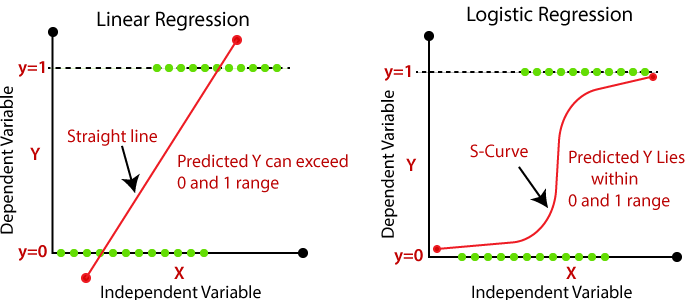

Para mais detalhes desse algoritmo clique [aqui](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

#### a) previsor_manual

Para o treinamento do modelo foi utilizado o algoritmo de regressão logística para classificação, cujos dados provisores foram o *encoding* manual e os dados do alvo. Observe, que os hiperparâmetro $C=1$, *solver* = *newton-cg*, *max_iter =50*, *penalty* = *none*, *tol* = *0.0001* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [144]:
logistica_manual = LogisticRegression(random_state=1, max_iter=50, penalty="none",
  tol=0.0001, C=1,solver="newton-cg")  # configurando os hiperparâmetros para elaboração do modelo de regressão logística.
logistica_manual.fit(x_treino_manual, y_treino_manual)  # treinando o algoritmo de regressão logística.

LogisticRegression(C=1, max_iter=50, penalty='none', random_state=1,
                   solver='newton-cg')

Foi obtido o coeficiente que intercepta o eixo da ordenada. 

In [145]:
logistica_manual.intercept_  # coeficiente da ordenada.

array([-3.34310134])

Foi obtido os coeficientes lineares da regressão múltipla, o array do código abaixo os mostra.

In [146]:
logistica_manual.coef_  # coeficiente lineares da regressão.

array([[ 0.01239583, -1.38463318,  0.67727412,  0.00321628,  0.00352298,
         1.02309094,  0.098054  , -0.01099279,  1.09843234,  0.22158323,
         1.76429753]])

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *encoding* manual, o código abaixo exibe isso.

In [147]:
previsoes_logistica_manual = logistica_manual.predict(x_teste_manual)   # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_logistica_manual* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,51%.

In [148]:
accuracy_score(y_teste_manual, previsoes_logistica_manual)  # medindo a acurácia do modelo com os dados de teste.

0.855072463768116

A matriz de confusão abaixo mostrou que existem 18 valores falsos negativos e 23 falsos positivos, ou seja, 41 valores errados de um total de 276 valores. 

In [149]:
confusion_matrix(y_teste_manual, previsoes_logistica_manual)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 99,  22],
       [ 18, 137]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 85,34%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [150]:
previsoes_logistica_treino = logistica_manual.predict(x_treino_manual) # previsões feitas pelo modelo da regressão logistica com dados de treino. 
accuracy_score(y_treino_manual, previsoes_logistica_treino)  # medindo a acurácia.

0.8533541341653667

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 85%. 

In [151]:
print(classification_report(y_teste_manual, previsoes_logistica_manual))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       121
           1       0.86      0.88      0.87       155

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



In [152]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LogisticRegression(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning de regresão logística, e
# carrega os hiperparâmetros "C", "solver", "max_iter", "penalty", "tol".
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro "penalty" é usado para evitar os problemas de autovariância e a multicolinearidade. 
# O hiperparâmetro "solver" é tipo de algoritmo que será usado na regressão logística para otimizar a elaboração do modelo.
# O hiperparâmetro "max_inter" é o máximo de interações que o algorítmo irá rodar para elaboração do modelo.
# O hiperparâmetro "tol" é a tolerância mínima que o algorimo continuará rodando caso caso não tenha concluído o número
# máximo de interações.
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### b) Validação Cruzada previsor_manual

Para a elaboração do modelo foi utilizado o algoritmo de regressão logística considerando os hiperparâmetros $C=1$, *solver* = *newton-cg*, *max_iter =50*, *penalty* = *none* e *tol* = *0.0001*, cujos dados provisores foram o *encoding* manual e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo da regressão logística e a validação cruzada, para dados de teste, foi de 84,18%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_maual*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [153]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = LogisticRegression(random_state=1, max_iter=50, penalty="l2",
            tol=0.0001, C=1,solver="lbfgs") # atribuindo os hiperparametros ao algoritmo da regressão
resultado = cross_val_score(modelo, previsores_manual, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Acurácia Média: 82.78%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [154]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### c) previsor_manual_esc

Para o treinamento do modelo foi utilizado o algoritmo de regressão logística para classificação, cujos dados provisores foram o *encoding* manual escalonado e os dados do alvo. Observe, que os hiperparâmetro $C=1$, *solver* = *lbfgs*, *max_iter =50*, *penalty* = *l2*, *tol* = *0.0001* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [155]:
logistica_manual_esc = LogisticRegression(random_state=1, max_iter=50, penalty="l2",
  tol=0.0001, C=1,solver="lbfgs")  # configurando os hiperparâmetros para elaboração do modelo de regressão logística.
logistica_manual_esc.fit(x_treino_manual_esc, y_treino_manual_esc)  # treinando o algoritmo de regressão logística.

LogisticRegression(C=1, max_iter=50, random_state=1)

Foi obtido o coeficiente que intercepta o eixo da ordenada. 

In [156]:
logistica_manual_esc.intercept_  # coeficiente da ordenada.

array([0.3851382])

Foi obtido os coeficientes lineares da regressão múltipla, o array do código abaixo os mostra.

In [157]:
logistica_manual_esc.coef_  # coeficiente lineares da regressão.

array([[ 0.11677224, -0.55231675,  0.62175529,  0.05750488,  0.18553309,
         0.42485648,  0.07854733, -0.28150798,  0.5346043 ,  0.24067594,
         1.04865539]])

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *encoding* manual escalonado, o código abaixo exibe isso.

In [158]:
previsoes_logistica_manual_esc = logistica_manual_esc.predict(x_teste_manual_esc)   # previsões feitas pelo modelo da regressão.

Foi medida a acurácia do modelo pelos valores de *previsoes_logistica_manual* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,51%.

In [159]:
accuracy_score(y_teste_manual_esc, previsoes_logistica_manual_esc)  # medindo a acurácia do modelo com os dados de teste.

0.855072463768116

A matriz de confusão abaixo mostrou que existem 18 valores falsos negativos e 22 falsos positivos, ou seja, 40 valores errados de um total de 276 valores. 

In [160]:
confusion_matrix(y_teste_manual_esc, previsoes_logistica_manual_esc)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 99,  22],
       [ 18, 137]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 85,18%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [161]:
previsoes_logistica_treino = logistica_manual_esc.predict(x_treino_manual_esc) # previsões feitas pelo modelo da regressão logistica com dados de treino. 
accuracy_score(y_treino_manual, previsoes_logistica_treino)  # medindo a acurácia.

0.8517940717628705

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 86%. 

In [162]:
print(classification_report(y_teste_manual_esc, previsoes_logistica_manual_esc))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       121
           1       0.86      0.88      0.87       155

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.86      0.85       276



In [163]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LogisticRegression(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning de regresão logística, e
# carrega os hiperparâmetros "C", "solver", "max_iter", "penalty", "tol".
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro "penalty" é usado para evitar os problemas de autovariância e a multicolinearidade. 
# O hiperparâmetro "solver" é tipo de algoritmo que será usado na regressão logística para otimizar a elaboração do modelo.
# O hiperparâmetro "max_inter" é o máximo de interações que o algorítmo irá rodar para elaboração do modelo.
# O hiperparâmetro "tol" é a tolerância mínima que o algorimo continuará rodando caso caso não tenha concluído o número
# máximo de interações.
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### d) Validação Cruzada previsor_manual_esc

Para a elaboração do modelo foi utilizado o algoritmo de regressão logística considerando os hiperparâmetros $C=1$, *solver* = *lbfgs*, *max_iter =50*, *penalty* = *l2* e *tol* = *0.0001*, cujos dados provisores foram o *encoding* manual escalonado e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo da regressão logística e a validação cruzada, para dados de teste, foi de 84,19%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_maual_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [164]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = LogisticRegression(random_state=1, max_iter=50, penalty="l2",
            tol=0.0001, C=1,solver="lbfgs") # atribuindo os hiperparametros ao algoritmo da regressão
resultado = cross_val_score(modelo, previsores_manual_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.19%


In [165]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### e) previsores_label_encoder

Para o treinamento do modelo foi utilizado o algoritmo de regressão logística para classificação, cujos dados provisores foram o *label encoder* e os dados do alvo. Observe, que os hiperparâmetro $C=1$, *solver* = *liblinear*, *max_iter =20*, *penalty* = *l2*, *tol* = *0.0001* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [166]:
logistica_label_encoder = LogisticRegression(random_state=1, max_iter=20, penalty="l2",
  tol=0.0001, C=1,solver="liblinear")  # configurando os hiperparâmetros para elaboração do modelo de regressão logística.
logistica_label_encoder.fit(x_treino_label_encoder, y_treino_label_encoder)  # treinando o algoritmo de regressão logística.

LogisticRegression(C=1, max_iter=20, random_state=1, solver='liblinear')

Foi obtido o coeficiente que intercepta o eixo da ordenada. 

In [167]:
logistica_label_encoder.intercept_  # coeficiente da ordenada.

array([0.34730557])

Foi obtido os coeficientes lineares da regressão múltipla, o array do código abaixo os mostra.

In [168]:
logistica_label_encoder.coef_  # coeficiente lineares da regressão.

array([[ 0.02131814,  1.3237798 , -0.57225311,  0.00400177,  0.00332288,
         0.96774463, -0.1833401 , -0.01050093,  1.11686853,  0.2584092 ,
        -1.70385527]])

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *label encoder*, o código abaixo exibe isso.

In [169]:
previsoes_logistica_label_encoder = logistica_label_encoder.predict(x_teste_label_encoder)   # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_logistica_label_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 85,15%.

In [170]:
accuracy_score(y_teste_label_encoder, previsoes_logistica_label_encoder)  # medindo a acurácia do modelo com os dados de teste.

0.8514492753623188

A matriz de confusão abaixo mostrou que existem 20 valores falsos negativos e 21 falsos positivos, ou seja, 41 valores errados de um total de 276 valores. 

In [171]:
confusion_matrix(y_teste_label_encoder, previsoes_logistica_label_encoder)  # exibindo a acurácia do modelo com os dados de teste.

array([[100,  21],
       [ 20, 135]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 84,55%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [172]:
previsoes_logistica_treino = logistica_label_encoder.predict(x_treino_label_encoder) # previsões feitas pelo modelo da regressão logistica com dados de treino. 
accuracy_score(y_treino_label_encoder, previsoes_logistica_treino)  # medindo a acurácia.

0.8455538221528861

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 85%. 

In [173]:
print(classification_report(y_teste_label_encoder, previsoes_logistica_label_encoder))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       121
           1       0.87      0.87      0.87       155

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [174]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LogisticRegression(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning de regresão logística, e
# carrega os hiperparâmetros "C", "solver", "max_iter", "penalty", "tol".
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro "penalty" é usado para evitar os problemas de autovariância e a multicolinearidade. 
# O hiperparâmetro "solver" é tipo de algoritmo que será usado na regressão logística para otimizar a elaboração do modelo.
# O hiperparâmetro "max_inter" é o máximo de interações que o algorítmo irá rodar para elaboração do modelo.
# O hiperparâmetro "tol" é a tolerância mínima que o algorimo continuará rodando caso caso não tenha concluído o número
# máximo de interações.
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### f) Validação Cruzada previsor_label_encoder

Para a elaboração do modelo foi utilizado o algoritmo de regressão logística considerando os hiperparâmetros $C=1$, *solver* = *liblinear*, *max_iter =20*, *penalty* = *l2* e *tol* = *0.0001*, cujos dados provisores foram o *label encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo da regressão logística e a validação cruzada, para dados de teste, foi de 84,73%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_label_encoder*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [175]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = LogisticRegression(random_state=1, max_iter=20, penalty="l2",
            tol=0.0001, C=1,solver="liblinear") # atribuindo os hiperparametros ao algoritmo da regressão
resultado = cross_val_score(modelo, previsores_label_encoder_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.73%


In [176]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### g) previsores_label_encoder_esc

Para o treinamento do modelo foi utilizado o algoritmo de regressão logística para classificação, cujos dados provisores foram o *label encoder escalonado* e os dados do alvo. Observe, que os hiperparâmetro $C=1$, *solver* = *saga*, *max_iter =100*, *penalty* = *l1*, *tol* = *0.0001* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [177]:
logistica_label_encoder_esc = LogisticRegression(random_state=1, max_iter=100, penalty="l1",
  tol=0.0001, C=1,solver="saga")  # configurando os hiperparâmetros para elaboração do modelo de regressão logística.
logistica_label_encoder_esc.fit(x_treino_label_encoder_esc, y_treino_label_encoder_esc)  # treinando o algoritmo de regressão logística.

LogisticRegression(C=1, penalty='l1', random_state=1, solver='saga')

Foi obtido o coeficiente que intercepta o eixo da ordenada. 

In [178]:
logistica_label_encoder_esc.intercept_  # coeficiente da ordenada.

array([0.3985489])

Foi obtido os coeficientes lineares da regressão múltipla, o array do código abaixo os mostra.

In [179]:
logistica_label_encoder_esc.coef_  # coeficiente lineares da regressão.

array([[ 0.15842041,  0.55786165, -0.54019944,  0.03406967,  0.15450485,
         0.43050773, -0.12492283, -0.28396267,  0.57005251,  0.24464467,
        -1.09161113]])

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *label encoder escalonado*, o código abaixo exibe isso.

In [180]:
previsoes_logistica_label_encoder_esc = logistica_label_encoder_esc.predict(x_teste_label_encoder)   # previsões feitas pelo modelo SVC.

Foi medida a acurácia do modelo pelos valores de *previsoes_logistica_label_encoder_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 63,40%.

In [181]:
accuracy_score(y_teste_label_encoder_esc, previsoes_logistica_label_encoder_esc)  # medindo a acurácia do modelo com os dados de teste.

0.6340579710144928

A matriz de confusão abaixo mostrou que existem 14 valores falsos negativos e 87 falsos positivos, ou seja, 101 valores errados de um total de 276 valores. 

In [182]:
confusion_matrix(y_teste_label_encoder_esc, previsoes_logistica_label_encoder_esc)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 34,  87],
       [ 14, 141]])

Foi observado que houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 84,87%. Portanto, um valor não próximo, aos resultados obitidos pelos dados de teste.

In [183]:
previsoes_logistica_treino = logistica_label_encoder_esc.predict(x_treino_label_encoder_esc) # previsões feitas pelo modelo da regressão logistica com dados de treino. 
accuracy_score(y_treino_label_encoder_esc, previsoes_logistica_treino)  # medindo a acurácia.

0.8486739469578783

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 63%. 

In [184]:
print(classification_report(y_teste_label_encoder_esc, previsoes_logistica_label_encoder_esc))

              precision    recall  f1-score   support

           0       0.71      0.28      0.40       121
           1       0.62      0.91      0.74       155

    accuracy                           0.63       276
   macro avg       0.66      0.60      0.57       276
weighted avg       0.66      0.63      0.59       276



In [185]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LogisticRegression(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning de regresão logística, e
# carrega os hiperparâmetros "C", "solver", "max_iter", "penalty", "tol".
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro "penalty" é usado para evitar os problemas de autovariância e a multicolinearidade. 
# O hiperparâmetro "solver" é tipo de algoritmo que será usado na regressão logística para otimizar a elaboração do modelo.
# O hiperparâmetro "max_inter" é o máximo de interações que o algorítmo irá rodar para elaboração do modelo.
# O hiperparâmetro "tol" é a tolerância mínima que o algorimo continuará rodando caso caso não tenha concluído o número
# máximo de interações.
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### h) Validação Cruzada previsor_label_encoder_esc

Para a elaboração do modelo foi utilizado o algoritmo de regressão logística considerando os hiperparâmetros $C=1$, *solver* = *saga*, *max_iter =100*, *penalty* = *l1* e *tol* = *0.0001*, cujos dados provisores foram o *label encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo da regressão logística e a validação cruzada, para dados de teste, foi de 84,62%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_label_encoder_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [186]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = LogisticRegression(random_state=1, max_iter=100, penalty="l1",
            tol=0.0001, C=1,solver="saga") # atribuindo os hiperparametros ao algoritmo da regressão
resultado = cross_val_score(modelo, previsores_label_encoder_esc, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo Naibe Bayes criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 84.62%


In [187]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### i) previsores_one_hot_encoder

Para o treinamento do modelo foi utilizado o algoritmo de regressão logística para classificação, cujos dados provisores foram o *one hot encoder* e os dados do alvo. Observe, que os hiperparâmetro $C=1$, *solver* = *saga*, *max_iter =100*, *penalty* = *l1*, *tol* = *0.0001* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [246]:
logistica_one_hot_encoder = LogisticRegression(random_state=1, max_iter=100, penalty="l1",
  tol=0.0001, C=100,solver="saga")  # configurando os hiperparâmetros para elaboração do modelo de regressão logística.
logistica_one_hot_encoder.fit(x_treino_hot_encoder, y_treino_hot_encoder)  # treinando o algoritmo de regressão logística.

LogisticRegression(C=100, penalty='l1', random_state=1, solver='saga')

Foi obtido o coeficiente que intercepta o eixo da ordenada. 

In [254]:
logistica_one_hot_encoder.intercept_  # coeficiente da ordenada.

array([-0.06769358])

Foi obtido os coeficientes lineares da regressão múltipla, o array do código abaixo os mostra.

In [255]:
logistica_one_hot_encoder.coef_  # coeficiente lineares da regressão.

array([[-0.65994431,  0.59242546,  1.25142036, -1.3157566 , -0.29957029,
         0.30080859,  0.18882167, -0.27145909,  0.        , -0.97115149,
         0.90346415]])

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *one hot encoder*, o código abaixo exibe isso.

In [249]:
previsoes_logistica_one_hot_encoder = logistica_one_hot_encoder.predict(x_teste_hot_encoder)   # previsões feitas pelo modelo de regressão.

Foi medida a acurácia do modelo pelos valores de *previsoes_logistica_one_hot_encoder* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 78,99%.

In [256]:
accuracy_score(y_teste_hot_encoder, previsoes_logistica_one_hot_encoder)  # medindo a acurácia do modelo com os dados de teste.

0.7898550724637681

A matriz de confusão abaixo mostrou que existem 23 valores falsos negativos e 35 falsos positivos, ou seja, 58 valores errados de um total de 276 valores. 

In [251]:
confusion_matrix(y_teste_hot_encoder, previsoes_logistica_one_hot_encoder)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 86,  35],
       [ 23, 132]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 79,25%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [260]:
previsoes_logistica_treino = logistica_one_hot_encoder.predict(x_treino_hot_encoder) # previsões feitas pelo modelo da regressão logistica com dados de treino. 
accuracy_score(y_treino_hot_encoder, previsoes_logistica_treino)  # medindo a acurácia.

0.7925117004680188

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 79%. 

In [257]:
print(classification_report(y_teste_hot_encoder, previsoes_logistica_one_hot_encoder))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       121
           1       0.79      0.85      0.82       155

    accuracy                           0.79       276
   macro avg       0.79      0.78      0.78       276
weighted avg       0.79      0.79      0.79       276



In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LogisticRegression(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning de regresão logística, e
# carrega os hiperparâmetros "C", "solver", "max_iter", "penalty", "tol".
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro "penalty" é usado para evitar os problemas de autovariância e a multicolinearidade. 
# O hiperparâmetro "solver" é tipo de algoritmo que será usado na regressão logística para otimizar a elaboração do modelo.
# O hiperparâmetro "max_inter" é o máximo de interações que o algorítmo irá rodar para elaboração do modelo.
# O hiperparâmetro "tol" é a tolerância mínima que o algorimo continuará rodando caso caso não tenha concluído o número
# máximo de interações.
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### j) Validação Cruzada previsor_one_hot_encoder

Para a elaboração do modelo foi utilizado o algoritmo de regressão logística considerando os hiperparâmetros $C=1$, *solver* = *saga*, *max_iter =100*, *penalty* = *l1* e *tol* = *0.0001*, cujos dados provisores foram o *label encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo da regressão logística e a validação cruzada, para dados de teste, foi de 79,38%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_hot_encoder*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [259]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = LogisticRegression(random_state=1, max_iter=100, penalty="l1",
            tol=0.0001, C=1,solver="saga") # atribuindo os hiperparametros ao algoritmo da regressão
resultado = cross_val_score(modelo, previsores_hot_encoder, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo de regregressão criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 79.38%


In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

#### k) previsores_one_hot_encoder_esc

Para o treinamento do modelo foi utilizado o algoritmo de regressão logística para classificação, cujos dados provisores foram o *one hot encoder escalonado* e os dados do alvo. Observe, que os hiperparâmetro $C=1$, *solver* = *newton-cg*, *max_iter =100*, *penalty* = *l2*, *tol* = *0.0001* foram utilizados, pois esses apresentaram os melhores resultados para o modelo.  

In [277]:
logistica_one_hot_encoder_esc = LogisticRegression(random_state=1, max_iter=100, penalty="l2",
  tol=0.0001, C=100,solver="newton-cg")  # configurando os hiperparâmetros para elaboração do modelo de regressão logística.
logistica_one_hot_encoder_esc.fit(x_treino_hot_encoder_esc, y_treino_hot_encoder_esc)  # treinando o algoritmo de regressão logística.

LogisticRegression(C=100, random_state=1, solver='newton-cg')

Foi obtido o coeficiente que intercepta o eixo da ordenada. 

In [282]:
logistica_one_hot_encoder_esc.intercept_  # coeficiente da ordenada.

array([0.30174063])

Foi obtido os coeficientes lineares da regressão múltipla, o array do código abaixo os mostra.

In [283]:
logistica_one_hot_encoder_esc.coef_  # coeficiente lineares da regressão.

array([[-0.2554121 ,  0.2554121 ,  0.56574806, -0.56047512, -0.172521  ,
         0.04055134,  0.10118175, -0.10300122,  0.02425499, -0.46017083,
         0.46017083]])

Foi possível obter as previsões do algoritmo com os dados de teste dos previsores feito o *one hot encoder*, o código abaixo exibe isso.

In [284]:
previsoes_logistica_one_hot_encoder_esc = logistica_one_hot_encoder_esc.predict(x_teste_hot_encoder_esc)   # previsões feitas pelo modelo de regressão.

Foi medida a acurácia do modelo pelos valores de *previsoes_logistica_one_hot_encoder_esc* e pelos dados de teste de alvo, o resultado percentual foi de aproximadamente 78,99%.

In [285]:
accuracy_score(y_teste_hot_encoder_esc, previsoes_logistica_one_hot_encoder_esc)  # medindo a acurácia do modelo com os dados de teste.

0.7898550724637681

A matriz de confusão abaixo mostrou que existem 23 valores falsos negativos e 35 falsos positivos, ou seja, 58 valores errados de um total de 276 valores. 

In [286]:
confusion_matrix(y_teste_hot_encoder_esc, previsoes_logistica_one_hot_encoder_esc)  # exibindo a acurácia do modelo com os dados de teste.

array([[ 86,  35],
       [ 23, 132]])

Foi observado que não houve *overfitting*, já que a acurácia medida com a saída dos dados de treino, cuja os dados de entrata para o modelo foram os previsores de treino, correspondeu ao valor de 79,25%. Portanto, um valor próximo, aos resultados obitidos pelos dados de teste.

In [287]:
previsoes_logistica_treino = logistica_one_hot_encoder_esc.predict(x_treino_hot_encoder_esc) # previsões feitas pelo modelo da regressão logistica com dados de treino. 
accuracy_score(y_treino_hot_encoder_esc, previsoes_logistica_treino)  # medindo a acurácia.

0.7925117004680188

Com o método *classification_report(...)* foi obtido um resumo geral da eficiência do modelo com os dados de teste. Nesse resumo, pode-se verificar, que a medida *f-score* atingiu o valor de 79%. 

In [288]:
print(classification_report(y_teste_hot_encoder_esc, previsoes_logistica_one_hot_encoder_esc))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75       121
           1       0.79      0.85      0.82       155

    accuracy                           0.79       276
   macro avg       0.79      0.78      0.78       276
weighted avg       0.79      0.79      0.79       276



In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# O método LogisticRegression(...) faz a configuração dos hiperparâmetros para o treinamento do modelo de machine learning de regresão logística, e
# carrega os hiperparâmetros "C", "solver", "max_iter", "penalty", "tol".
# O hiperparâmetro "C" controla a tolerância dos erros. Observe que quanto maior o valor desse parâmetro, maior pode
# ser a separação das classes, porém maior é a probabilidade de overfitting e de tempo de treinamento.
# O hiperparâmetro "penalty" é usado para evitar os problemas de autovariância e a multicolinearidade. 
# O hiperparâmetro "solver" é tipo de algoritmo que será usado na regressão logística para otimizar a elaboração do modelo.
# O hiperparâmetro "max_inter" é o máximo de interações que o algorítmo irá rodar para elaboração do modelo.
# O hiperparâmetro "tol" é a tolerância mínima que o algorimo continuará rodando caso caso não tenha concluído o número
# máximo de interações.
# O método que faz necessariamente o treinamento é o fit(...)
# O método .predict(...) permite fazer as previsões do modelo, ou seja, retorna um array contendo as respostas. 
# O método accuracy_score(...) avalia a acurácia entre as respostas dadas pelo modelo com as respostas de teste.
# O método confusion_matrix(...) gera a matriz de confusão com os valores de teste e os valores da resposta do modelo.
# O método classification_report(...) passa as informações da precisão, acurácia e do f1-score. Portanto, permite
# avaliar se existe ou não overfitting.

#### j) Validação Cruzada previsor_one_hot_encoder_esc

Para a elaboração do modelo foi utilizado o algoritmo de regressão logística considerando os hiperparâmetros $C=1$, *solver* = *newton-cg*, *max_iter =100*, *penalty* = *l2* e *tol* = *0.0001*, cujos dados provisores foram o *label encoder* e os dados do alvo.

A validação cruzada permite separar os dados de treino e de teste de maneiras diferentes, permitindo assim medir a acurácia do modelo pela média de cada resultado das separações e assim avaliar se a separação manualmente feita é adequada. O valor para a acurácia, utilizando o algoritmo da regressão logística e a validação cruzada, para dados de teste, foi de 79,27%. Portanto, foi concluído, que a forma como foi separado os dados provisores (*previsor_hot_encoder_esc*) e alvos (*alvo*), em treino e teste, na seção *Base de Treino e Teste*, foi ideal, já que a acurácia pela validação cruzada e sem a validação cruzada deram resultados próximos.  


In [289]:
kfold = KFold(n_splits = 30, shuffle=True, random_state = 5) # Separando os dados de 30 maneiras diferetes.
modelo = LogisticRegression(random_state=1, max_iter=100, penalty="l2",
            tol=0.0001, C=1,solver="newton-cg") # atribuindo os hiperparametros ao algoritmo da regressão
resultado = cross_val_score(modelo, previsores_hot_encoder, alvo, cv = kfold) # Gerando um array contendo a acurácia do modelo de regregressão criado utilizando a validação cruzada.
print("Acurácia Média: %.2f%%" % (resultado.mean() * 100.0)) # Tirando a média das 30 separações dos dados.

Acurácia Média: 79.27%


In [ ]:
# COMENTÁRIOS SOBRE O CÓDIGO 

# KFold() é um método que permite separar o conjunto dos dados em treino e teste de maneiras distintas. O argumento 
# n-splits específica o número de seração que serão feitas, já o argumento random_state informa a samente a qual  
# específica sempre o mesmo conjunto de separações feitas.
# O método cross_val_score mede a acurácia do modelo criado através das separações feitas pela validação cruzada.

### 7.4) KNN (Aprendizagem Baseadas em Instâncias )

**Resumo:** o K Nearest Neighbors (KNN) ou os K vizinhos mais próximos é um algoritmo de aprendizagem de máquina supervisionado que é utilizado majoritariamente em problemas de classificação, porém também é aplicado em problemas de regressão.

O KNN não possui a etapa de treinamento para o seu modelo, esse armazena todos os dados de treinamento, e a cada nova instância que se deja classificar, cálculos comparativos são realizados. O comparativo entre as instâncias ocorre por meio do cálculo da distância entre os vetores no espaço euclidiano. Para o cálculo das distâncias existem diferentes méticas, tais como: Euclidiana, Hamming, Manhattan, Minkowski, Chebyshev, ...

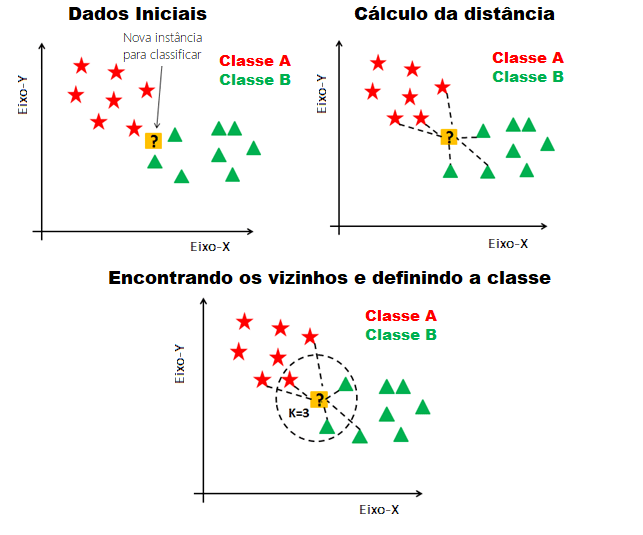

Na imagem acima todos os dados estão dispostos no espaço euclidiano. O algoritmo realiza o cálculo da distância euclidiana entre a nova instância e todas as outras instâncias já foram classificadas. Com todas as distâncias calculadas, os K elementos mais próximos são selecionados e suas classes são analisadas. A classe que obteve maior representatividade através dos K vizinhos mais próximos será usada para definir o rótulo da nova instância. Nesse exemplo, o novo elemento corresponde a Classe B.




### 7.5) Árvore de Decisão

**Resumo:** a árvore de decisão é aplicada em problemas de linguagem supervisionada, tanto para classificação, como para a regressão. Esse algoritmo seleciona como a ordem dos elementos irão aparecer (uma espécie de árvore), separando-os conforme sua importância na predição, sempre de cima para baixo, onde elementos mais de cima são mais relevantes.

A árvore de decisão é similar a um fluxograma e é composta pelos seguintes elementos: nós, ramos e folhas. Os nós raiz estão ligados pelos ramos aos nós filhos, os últimos elmentos que estão ligados pelos ramos aos nós filhos constituem as folhas. A  imagem abaixo ajuda a ilustrar a ideia do algoritmo da árvore de decisão.

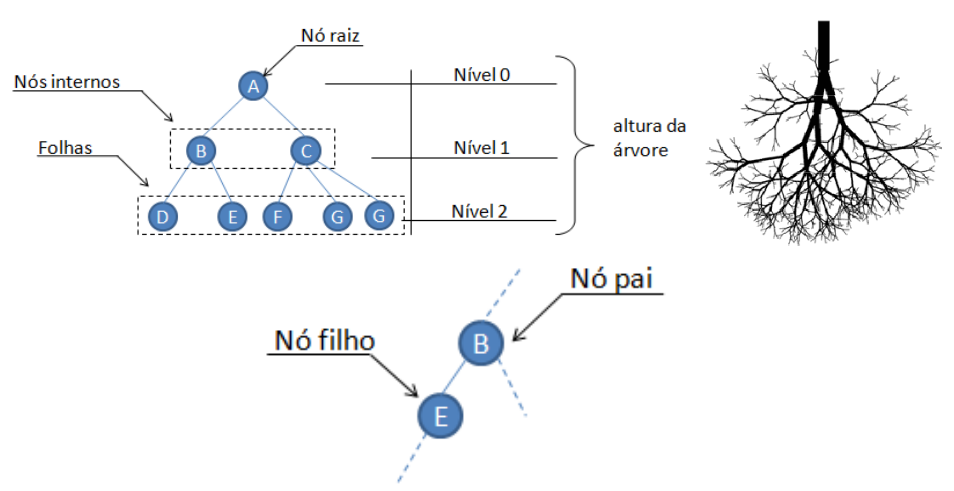


Para determinar o nível da importância de um atributo e definir a hierarquia desse na árvore de decisão, deve-se calcular o **ganho de informação**, o qual utiliza diferentes métricas, sendo as mais importantes a **entropia** (mede a falta de homogenidade) e o **índice de Gini** (mede o grau de heterogeneidade).

Expressão para o cálculo da entropia $$ E(S) = - \sum_{i=1}^{n}p_{i} \ log_{2}(p_i), $$
onde $p$ é a probabilidade da ocorrência de um atributo nos dados e $n$ é o número de classes que pode ser atingida.

Expressão para o cálculo do índice de Gini $$Indice \ Gini \ = 1 - \sum_{i=1}^{n}p_{i}^2. $$

Expressão para o cálculo do ganho de informação $$ G(S,a) = E(S)\ -\sum_{i=1}^{n}\ p(a)P(i|a) \ log_{2}(P(i|a)), $$ onde $p(a)$ é a probabilidade da ocorrência de uma categoria de um determinado atributo e $ P(i|a) $ é a probabilidade de $i$ ocorrer dado que $a$ já tenha ocorrido.



### 7.6) Random Forest

**Resumo:** o algoritmo Random Forest cria um conjunto de árvores de decisão de forma aleatória para a seleção de variáveis, o qual utiliza o método esemble, ou seja, costrói vários modelos para obter um único resultado. Esse algoritmo é mais robusto e complexo, por essa razão propicia resultados melhores, porém possue um custo computacional maior. 

Em problemas de classificação o resultado final é a moda do conjunto de modelos de árvores produzidas, já na regressão o resultado final corresponde a média.

A imagem abaixo mostra a ideia desse algoritmo.

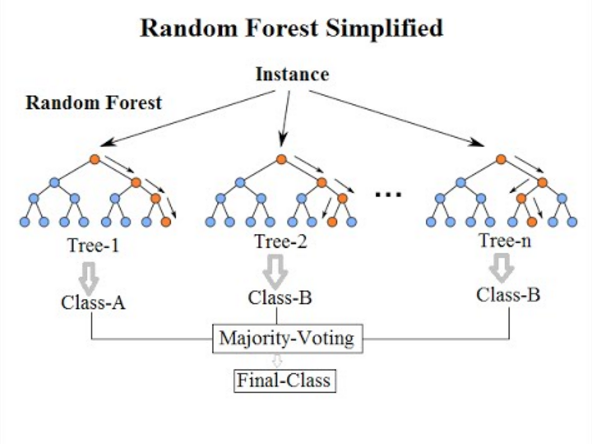


### 7.7) XGBoost

**Resumo:** o algoritmo XGBoost é uma das evoluções do Random Forest, assim possue os mesmos conceitos do conjunto de árvore de decisão, porém seleciona a melhor árvore pelo método gradiente.

### 7.8) Light GBM

**Resumo:** o algoritmo LGBM é uma estrutura de levantamento de gradiente rápida e de alto desempenho, que tem como base, assim como o XGBoost, a árvore de decisão. Ele é usado em classificação e regressão nos modelos de *machine learning*. Ao contrário do XGBoost esse algoritmo cresce em termos de folha, crescendo naquela que tem maior perda.

O light GBM apresenta vantagens, como menos uso de memória,
redução no custo de comunicação para aprendizagem paralela
e redução no custo para calcular o ganho para cada divisão na árvore de decisão.

### 7.9) Catboost

**Resumo:** o CatBoost é outro algoritmo baseado em árvores de decisão e é uma evolução do algoritmo Gradient Boosting.

## 8) Conclusão

## 9) Referências

* https://en.wikipedia.org/wiki/Support-vector_machine

* https://alvarezsolucoesdigitais.com/aprendizado-de-maquina/maquinas-de-vetores-de-suportes-svm-introducao-aos-algoritmos-de-aprendizado-de-maquina/

* https://anderfernandez.com/en/blog/code-logistic-regression-r-from-scratch/

* https://medium.com/@msremigio/aprendizagem-baseada-em-inst%C3%A2ncias-knn-7e2c6f0778bc

* https://saulo.arisa.com.br/wiki/images/c/cb/Arvore_01.png

* https://www.tibco.com/pt-br/reference-center/what-is-a-random-forest

* https://en.wikipedia.org/wiki/Random_forest#/media/File:Random_forest_diagram_complete.png

* https://acervolima.com/lightgbm-vs-xgboost-qual-algoritmo-e-melhor/
